Almost every company in existance has a singular idea in mind: make money. In order to achieve this goal, the company must have an inflow of money greater than their expenses, generally by having customers that continually spend money there; after all, 80 percent of a businesses is done by 20 percent of its customers, and because of this, it's extremely important not to lose customers. If making money is the why, keeping customers is the how.

Calculating customer churn is therefore extremely important for a company for achieving their goal. More specifically, determining why customers are leaving and performing any course correction (if applicable) can be the difference between solvency and bankruptcy. Using sample data found at [https://www.kaggle.com/jpacse/datasets-for-churn-telecom?select=cell2celltrain.csv], this capstone seeks to find if clusters can be found that are can correctly classify if a customer will stay or not.

In [1]:
#import the necessities
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import umap
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, average_precision_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

## Step 1: Data Cleaning

In [2]:
#load the data
df = pd.read_csv('D:/DSF Files/cell_train.csv')

In [3]:
#define the functions that will be used for testing
def minikmeans_test(clusters, batch):
    cluster = MiniBatchKMeans(random_state=357,
        init='random', n_clusters=clusters, batch_size=batch)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def kmeans_test(n):
    cluster = KMeans(n_clusters=n, random_state=357)
    cluster.fit(X)
    y_pred = cluster.predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def dbscan_test(epsilon, samples):
    cluster = DBSCAN(eps = epsilon, min_samples = samples)
    y_pred = cluster.fit_predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))

def gmm_test(n):
    cluster = GaussianMixture(n_components=n, random_state=357)
    y_pred = cluster.fit_predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def agg_test(link, n):
    cluster = AgglomerativeClustering(linkage=link, affinity='euclidean', n_clusters=n)
    y_pred = cluster.fit_predict(X)
    auprc = average_precision_score(y, y_pred)
    print('AUPRC score: {0:0.2f}'.format(auprc))
    sil = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('Silhouette score: {0:0.2f}'.format(sil))
    ari = metrics.adjusted_rand_score(y, y_pred)
    print('ARI score: {0:0.2f}'.format(ari))
    
def pca_test(data):
    for n in range(2, len(data.columns)):
        pca = PCA(n_components=n).fit(X)
        print('Variance explained by {} components: {:0.2f}'.format(n, (pca.explained_variance_ratio_).sum()))
        
def tsne_test(n, p):
    tsne = TSNE(n_components=n, verbose=0, perplexity=p, n_iter=300, n_jobs=-1)
    tsne_results = tsne.fit_transform(X)
    plt.figure(figsize=(10,5))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
def umap_test(n, d):
    umap_results = umap.UMAP(n_neighbors=n, min_dist=d,
                      metric='correlation').fit_transform(X)
    print('Parameters: {}, {}'.format(n, d))
    plt.figure(figsize=(10,5))
    plt.scatter(umap_results[:, 0], umap_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    
def dbscan_opt(n):
    neigh = NearestNeighbors(n_neighbors=n)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.figure(figsize=(15,10))
    plt.ylim([0, 5])
    plt.plot(distances);
    
def agg_opt():
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram with linkage method: average")
    dendrogram(linkage(X, method='average'))
    plt.show()
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram with linkage method: complete")
    dendrogram(linkage(X, method='complete'))
    plt.show()
    plt.figure(figsize=(20,10))
    plt.title("Dendrogram with linkage method: ward")
    dendrogram(linkage(X, method='ward'))
    plt.show()

In [4]:
#check the df
display(df.head())
display(df.info())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

None

In [5]:
objects = []
for i in range(len(df.columns)):
    if df.iloc[:, i].dtype == 'object':
        objects.append(i)
for i in objects:
    print('\nColumn number: {}'.format(i))
    display(df.iloc[:, i].value_counts())


Column number: 1


No     36336
Yes    14711
Name: Churn, dtype: int64


Column number: 26


NYCBRO917    1684
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
SANROM956       1
ATLWMP870       1
ATLSEN662       1
PITUNT412       1
OHIMTV740       1
Name: ServiceArea, Length: 747, dtype: int64


Column number: 32


No     38679
Yes    12368
Name: ChildrenInHH, dtype: int64


Column number: 33


No     43956
Yes     7091
Name: HandsetRefurbished, dtype: int64


Column number: 34


Yes    46046
No      5001
Name: HandsetWebCapable, dtype: int64


Column number: 35


No     41524
Yes     9523
Name: TruckOwner, dtype: int64


Column number: 36


No     46894
Yes     4153
Name: RVOwner, dtype: int64


Column number: 37


Known      33987
Unknown    17060
Name: Homeownership, dtype: int64


Column number: 38


No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64


Column number: 39


No     31821
Yes    19226
Name: RespondsToMailOffers, dtype: int64


Column number: 40


No     50295
Yes      752
Name: OptOutMailings, dtype: int64


Column number: 41


No     48168
Yes     2879
Name: NonUSTravel, dtype: int64


Column number: 42


No     41583
Yes     9464
Name: OwnsComputer, dtype: int64


Column number: 43


Yes    34503
No     16544
Name: HasCreditCard, dtype: int64


Column number: 46


No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64


Column number: 47


No     44012
Yes     7035
Name: NotNewCellphoneUser, dtype: int64


Column number: 50


No     50368
Yes      679
Name: OwnsMotorcycle, dtype: int64


Column number: 52


Unknown    28982
30          7328
150         4115
130         2105
80          1960
10          1928
60          1776
200         1266
100         1235
40           249
400           46
250           20
300           13
180           10
500            8
240            6
Name: HandsetPrice, dtype: int64


Column number: 53


No     49302
Yes     1745
Name: MadeCallToRetentionTeam, dtype: int64


Column number: 54


2-High       18993
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: CreditRating, dtype: int64


Column number: 55


Other       24655
Suburban    16378
Town         7589
Rural        2425
Name: PrizmCode, dtype: int64


Column number: 56


Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64


Column number: 57


Unknown    19700
Yes        18651
No         12696
Name: MaritalStatus, dtype: int64

Drop CustomerID, ServiceArea, Homeownership?, NewCellphoneUser / NotNewCellphoneUser, HandsetPrice, PrizmCode, Occupation, MaritalStatus<br>
CustomerID because it serves only as an identifier and the index value will serve that purpose for us.<br>
ServiceArea because there are several 1 columns and the data is nominal.<br>
Homeownership because it is categorized between known and unknown, meaning the data would likely be prone to error.<br>
NewCellphoneUser and NotNewCellphoneUser seems to be contradictory in terms of data.<br>
HandsetPrice because it has 'Unknown' as a value for over half of the data and filling in the data with '0' would skew the data and interpolation is difficult if not impossible.<br>
PrizmCode because it has a value of 'Other' that is about half of the data and the data is nominal.<br>
Occupation because it has a value of other that is about three-quarters of the data and the data is nominal.<br>
MaritalStatus because it has a value of other that is about two-fifths of the data and the data is nominal.<br><br>

## Step 2: Feature Engineering

Convert Churn, ChildrenInHH, HandsetRefurbished, HandsetWebCapable, TruckOwner, RVOwner, BuysViaMailOrder, RespondsToMailOffers, OptOutMailings, NonUSTravel, OwnsComputer, HasCreditCard, OwnsMotorcycle, MadeCallToRetentionTeam, CreditRating to binary values<br>
*Credit rating will be based on Good or Better

In [6]:
dummy = df.copy()
names = []
for i in objects:
    if len(dummy.iloc[:, i].value_counts()) > 2:
        names.append(dummy.columns[i])
names.append('Homeownership')
names.append('NewCellphoneUser')
names.append('NotNewCellphoneUser')
dummy = dummy.select_dtypes(include=object)
for name in names:
    del dummy[name]
dummy['HighestCredit'] = np.where(df['CreditRating'].str.contains('1'), 1, 0)
dummy['BetterCredit'] = np.where(df['CreditRating'].str.contains('2'), 1, 0)
dummy['GoodCredit'] = np.where(df['CreditRating'].str.contains('3'), 1, 0)
dummy['Has Good Credit'] = (dummy['HighestCredit'] + dummy['BetterCredit'] + dummy['GoodCredit'])
dummy.head()

,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,OwnsMotorcycle,MadeCallToRetentionTeam,HighestCredit,BetterCredit,GoodCredit,Has Good Credit
0,Yes,No,No,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,Yes,1,0,0,1
1,Yes,Yes,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,0,0,0,0
2,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,0,0,1,1
3,No,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,0,0,0,0
4,Yes,No,No,No,No,No,Yes,Yes,No,No,Yes,Yes,No,No,1,0,0,1


In [7]:
dummy['Has Children'] = np.where(dummy['ChildrenInHH'].str.contains('Yes'), 1, 0)
dummy['Handset Refurbished'] = np.where(dummy['HandsetRefurbished'].str.contains('Yes'), 1, 0)
dummy['Handset Web Capable'] = np.where(dummy['HandsetWebCapable'].str.contains('Yes'), 1, 0)
dummy['Has Truck'] = np.where(dummy['TruckOwner'].str.contains('Yes'), 1, 0)
dummy['Has RV'] = np.where(dummy['RVOwner'].str.contains('Yes'), 1, 0)
dummy['Used Mail Order'] = np.where(dummy['BuysViaMailOrder'].str.contains('Yes'), 1, 0)
dummy['Uses Mail Offers'] = np.where(dummy['RespondsToMailOffers'].str.contains('Yes'), 1, 0)
dummy['Gets Mail Offers'] = np.where(dummy['OptOutMailings'].str.contains('No'), 1, 0)
dummy['Non-US Travel'] = np.where(dummy['NonUSTravel'].str.contains('Yes'), 1, 0)
dummy['Has Computer'] = np.where(dummy['OwnsComputer'].str.contains('Yes'), 1, 0)
dummy['Gas Credit Card'] = np.where(dummy['HasCreditCard'].str.contains('Yes'), 1, 0)
dummy['Has Motorcycle'] = np.where(dummy['OwnsMotorcycle'].str.contains('Yes'), 1, 0)
dummy['CalledRetention'] = np.where(dummy['MadeCallToRetentionTeam'].str.contains('Yes'), 1, 0)
dummy['Churn'] = np.where(dummy['Churn'].str.contains('Yes'), 1, 0)
dummy = dummy.select_dtypes(exclude=object)
dummy = dummy.drop(['HighestCredit', 'BetterCredit', 'GoodCredit'], 1)

In [8]:
model = df.select_dtypes(exclude=object)
model = model.dropna()
model = model.merge(dummy, left_index=True, right_index=True)
del model['CustomerID']
model.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Has Truck,Has RV,Used Mail Order,Uses Mail Offers,Gets Mail Offers,Non-US Travel,Has Computer,Gas Credit Card,Has Motorcycle,CalledRetention
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,0,0,1,1,1,0,1,1,0,1
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,...,0,0,1,1,1,0,1,1,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,...,0,0,1,1,1,0,0,1,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,...,0,0,1,1,1,0,1,1,0,0


## Step 3: Model Evaluation

In [9]:
#seperate the target variable from the rest
y = model['Churn']
X = model.drop(['Churn'], 1)
#scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.28
Silhouette score: 0.26
ARI score: -0.01

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.10
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.30
Silhouette score: 0.11
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.28
Silhouette score: 0.10
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.29
Silhouette score: 0.07
ARI score: 0.00

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.07
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.29
Silhouette score: 0.07
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.28
Silhouette score: 0.08
ARI score: -0.00

Number of clusters: 10
AUPRC score: 0.28
Silhouette score: 0.10
ARI score: 0.00


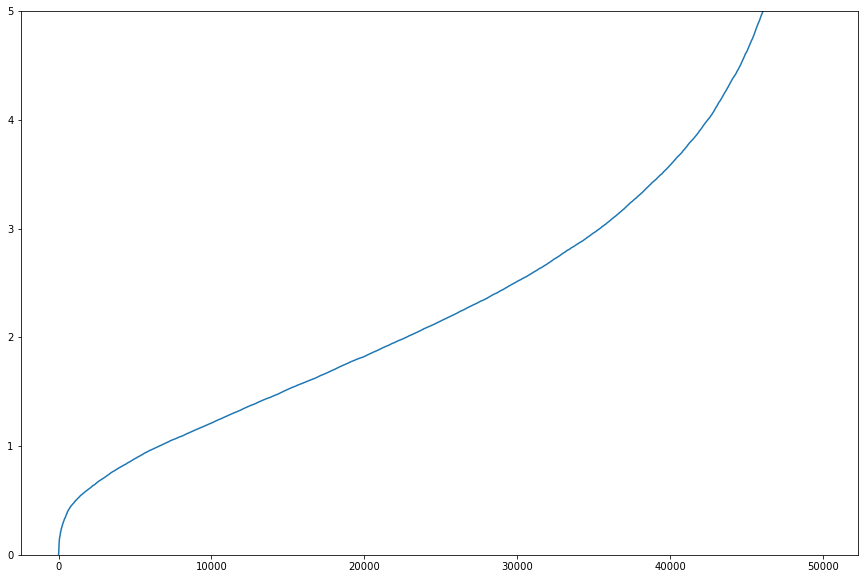

In [11]:
dbscan_opt(2)

In [12]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(2,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.29
Silhouette score: -0.23
ARI score: 0.00
Total time: 301.69398760795593 seconds.

AUPRC score: 0.29
Silhouette score: -0.22
ARI score: 0.00
Total time: 314.07574939727783 seconds.

AUPRC score: 0.29
Silhouette score: -0.24
ARI score: 0.00
Total time: 282.4819071292877 seconds.

AUPRC score: 0.29
Silhouette score: -0.23
ARI score: 0.01
Total time: 256.2542760372162 seconds.

AUPRC score: 0.29
Silhouette score: -0.23
ARI score: 0.01
Total time: 255.08865571022034 seconds.

AUPRC score: 0.29
Silhouette score: -0.21
ARI score: 0.01
Total time: 256.30605816841125 seconds.

AUPRC score: 0.29
Silhouette score: -0.21
ARI score: 0.01
Total time: 256.00971245765686 seconds.

AUPRC score: 0.29
Silhouette score: -0.22
ARI score: 0.01
Total time: 254.82255220413208 seconds.

AUPRC score: 0.29
Silhouette score: -0.22
ARI score: 0.01
Total time: 257.95914244651794 seconds.

AUPRC score: 0.29
Silhouette score: -0.23
ARI score: 0.01
Total time: 255.7531020641327 seconds.



In [13]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.32
ARI score: 0.01

Number of clusters: 3
AUPRC score: 0.29
Silhouette score: 0.09
ARI score: 0.00

Number of clusters: 4
AUPRC score: 0.30
Silhouette score: 0.10
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.28
Silhouette score: 0.06
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.28
Silhouette score: 0.08
ARI score: 0.00

Number of clusters: 7
AUPRC score: 0.28
Silhouette score: 0.06
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.29
Silhouette score: 0.06
ARI score: 0.01

Number of clusters: 9
AUPRC score: 0.29
Silhouette score: 0.03
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.28
Silhouette score: 0.01
ARI score: 0.00


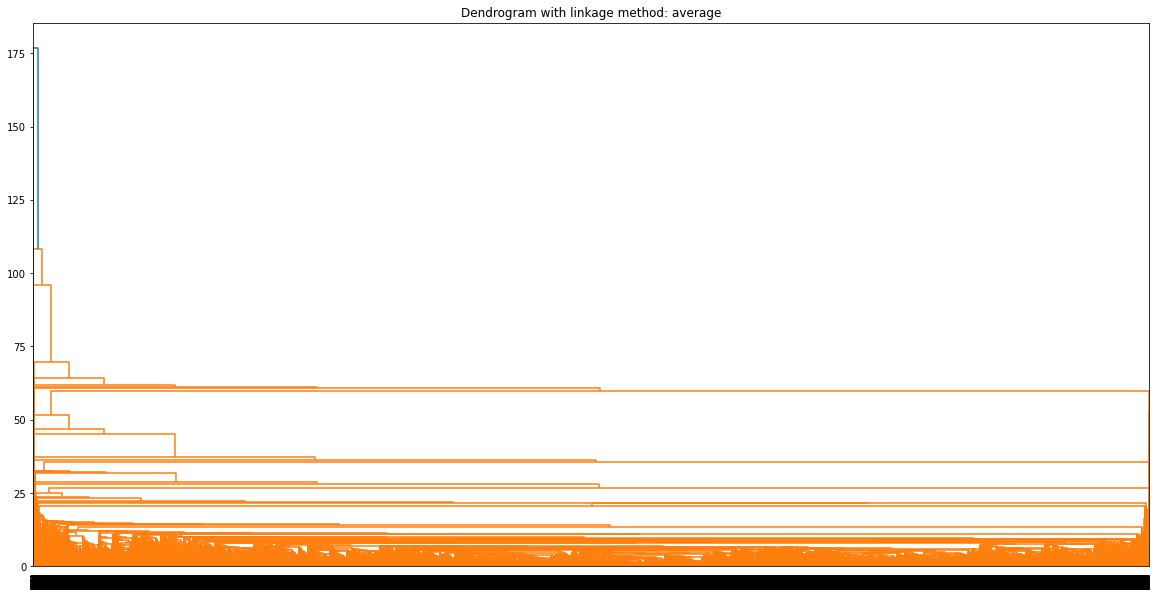

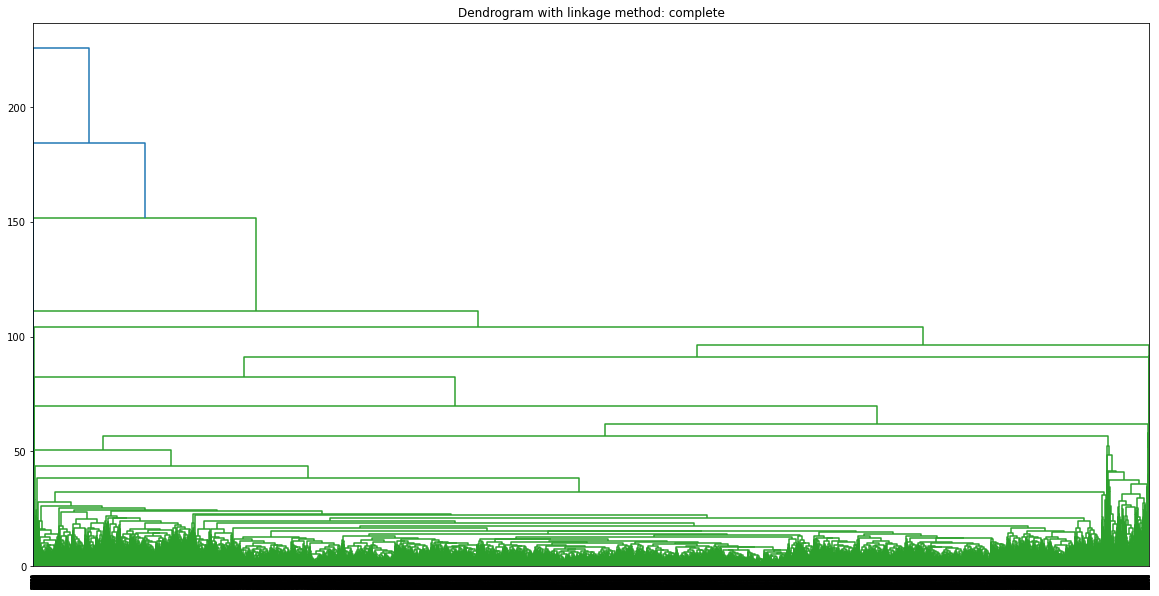

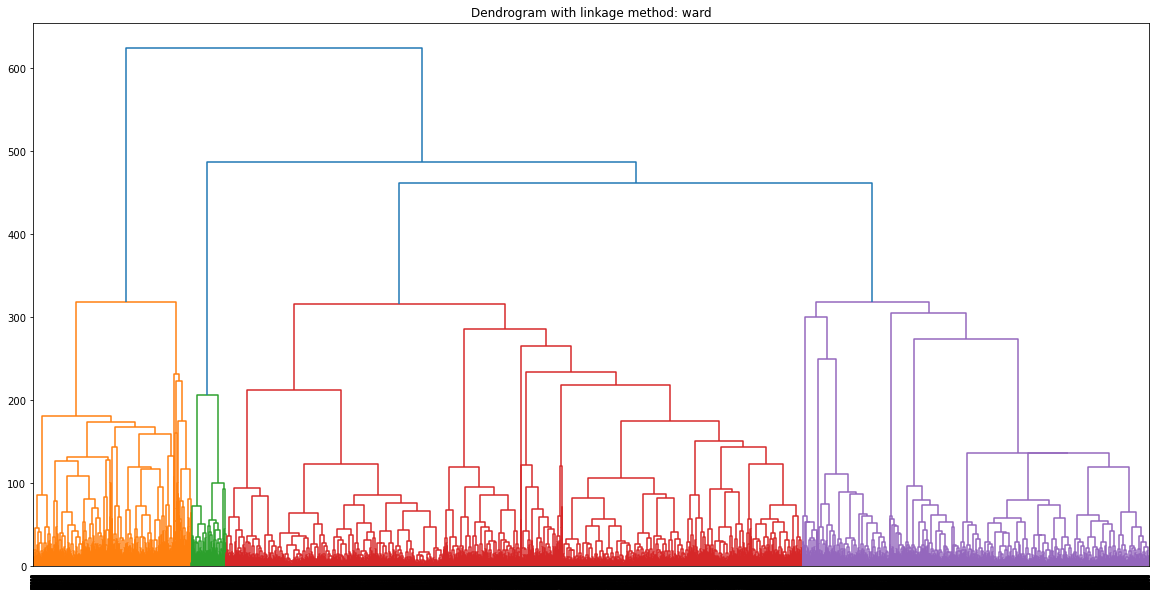

In [14]:
agg_opt()

In [15]:
agg_test('ward', 4)

AUPRC score: 0.29
Silhouette score: 0.08
ARI score: -0.00


After only scaling the data, the highest values found were 0.29 for AUPRC, 0.32 for the Silhouette, and 0.01 for the ARI.<br><br>
We will now apply PCA to see if reducing the dimensionalty helps with the data.

In [16]:
pca_test(model)

Variance explained by 2 components: 0.28
Variance explained by 3 components: 0.34
Variance explained by 4 components: 0.38
Variance explained by 5 components: 0.42
Variance explained by 6 components: 0.46
Variance explained by 7 components: 0.49
Variance explained by 8 components: 0.52
Variance explained by 9 components: 0.55
Variance explained by 10 components: 0.58
Variance explained by 11 components: 0.60
Variance explained by 12 components: 0.62
Variance explained by 13 components: 0.64
Variance explained by 14 components: 0.66
Variance explained by 15 components: 0.68
Variance explained by 16 components: 0.70
Variance explained by 17 components: 0.72
Variance explained by 18 components: 0.74
Variance explained by 19 components: 0.76
Variance explained by 20 components: 0.78
Variance explained by 21 components: 0.80
Variance explained by 22 components: 0.81
Variance explained by 23 components: 0.83
Variance explained by 24 components: 0.84
Variance explained by 25 components: 0.86


In [17]:
pca = PCA(n_components=33)
X = pca.fit_transform(X)

In [18]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.27
ARI score: -0.01

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.11
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.12
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.30
Silhouette score: 0.12
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.28
Silhouette score: 0.11
ARI score: -0.00

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.08
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.29
Silhouette score: 0.09
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.30
Silhouette score: 0.08
ARI score: 0.01

Number of clusters: 10
AUPRC score: 0.28
Silhouette score: 0.09
ARI score: 0.00


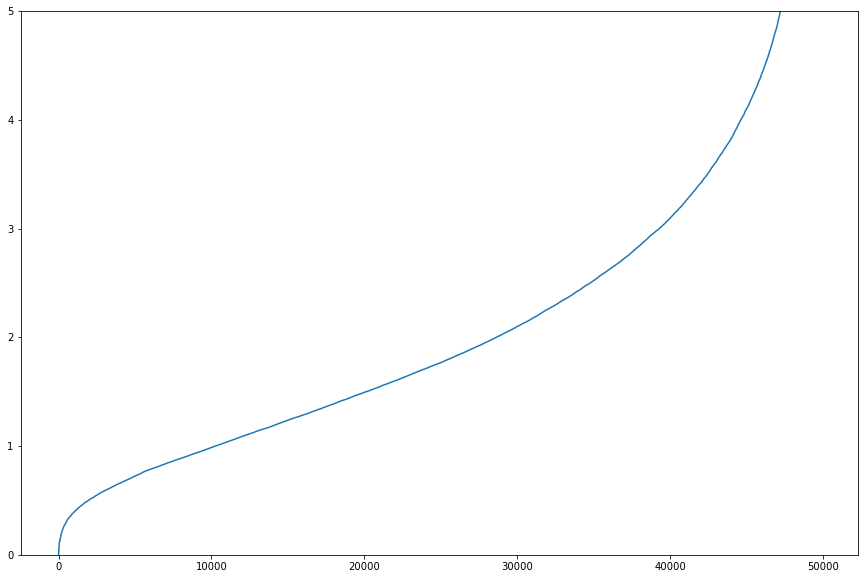

In [19]:
dbscan_opt(2)

In [20]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(3,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.29
Silhouette score: -0.01
ARI score: 0.01
Total time: 154.6277561187744 seconds.

AUPRC score: 0.29
Silhouette score: -0.02
ARI score: 0.01
Total time: 154.74013447761536 seconds.

AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.01
Total time: 157.30303645133972 seconds.

AUPRC score: 0.29
Silhouette score: -0.06
ARI score: 0.01
Total time: 156.47467231750488 seconds.

AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.00
Total time: 162.01017570495605 seconds.

AUPRC score: 0.29
Silhouette score: -0.06
ARI score: 0.00
Total time: 155.4726152420044 seconds.

AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.00
Total time: 155.26610255241394 seconds.

AUPRC score: 0.29
Silhouette score: -0.05
ARI score: 0.00
Total time: 157.33411931991577 seconds.

AUPRC score: 0.28
Silhouette score: 0.05
ARI score: -0.00
Total time: 159.07857584953308 seconds.

AUPRC score: 0.28
Silhouette score: 0.05
ARI score: -0.00
Total time: 156.2595455646515 seconds.



In [21]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.21
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.29
Silhouette score: 0.09
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.07
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.29
Silhouette score: 0.03
ARI score: -0.00

Number of clusters: 6
AUPRC score: 0.29
Silhouette score: 0.03
ARI score: -0.00

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.05
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.29
Silhouette score: 0.03
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.28
Silhouette score: 0.04
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.28
Silhouette score: 0.04
ARI score: 0.00


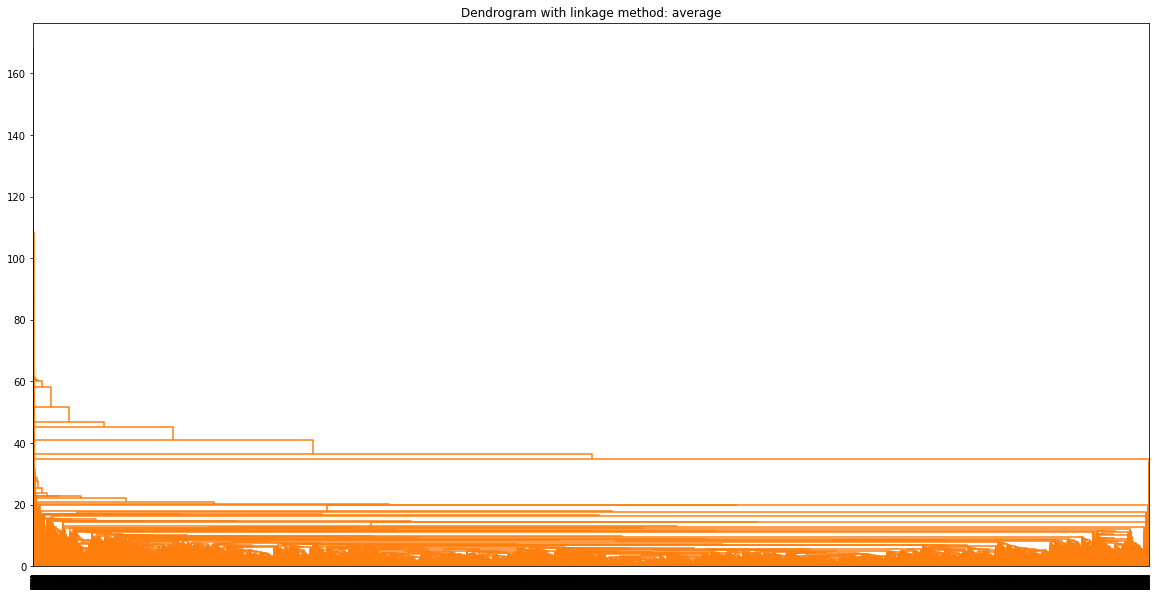

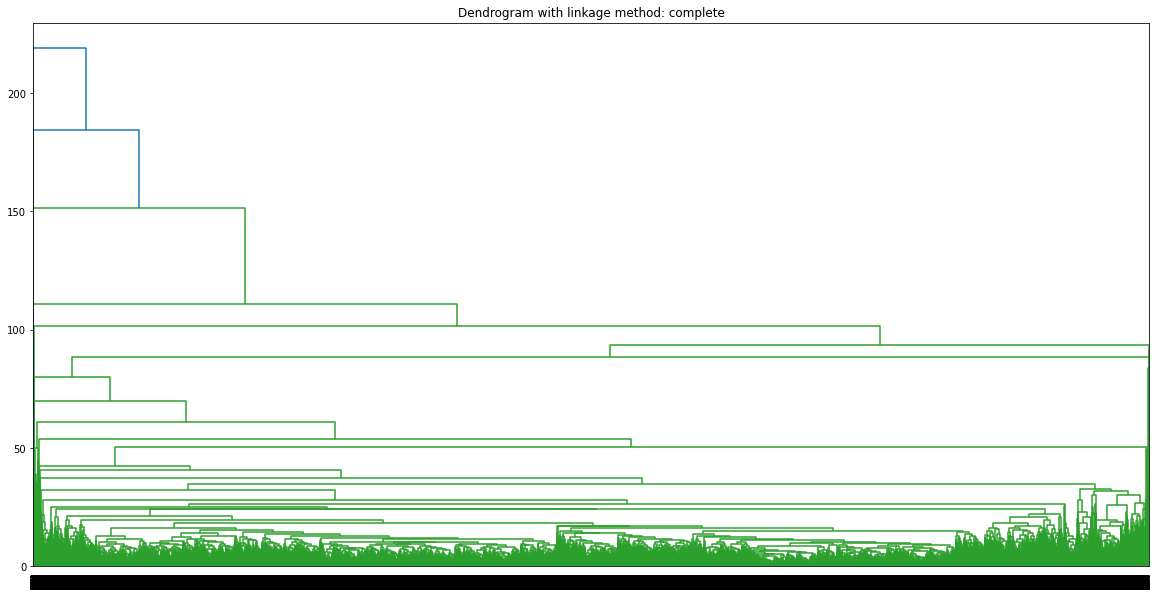

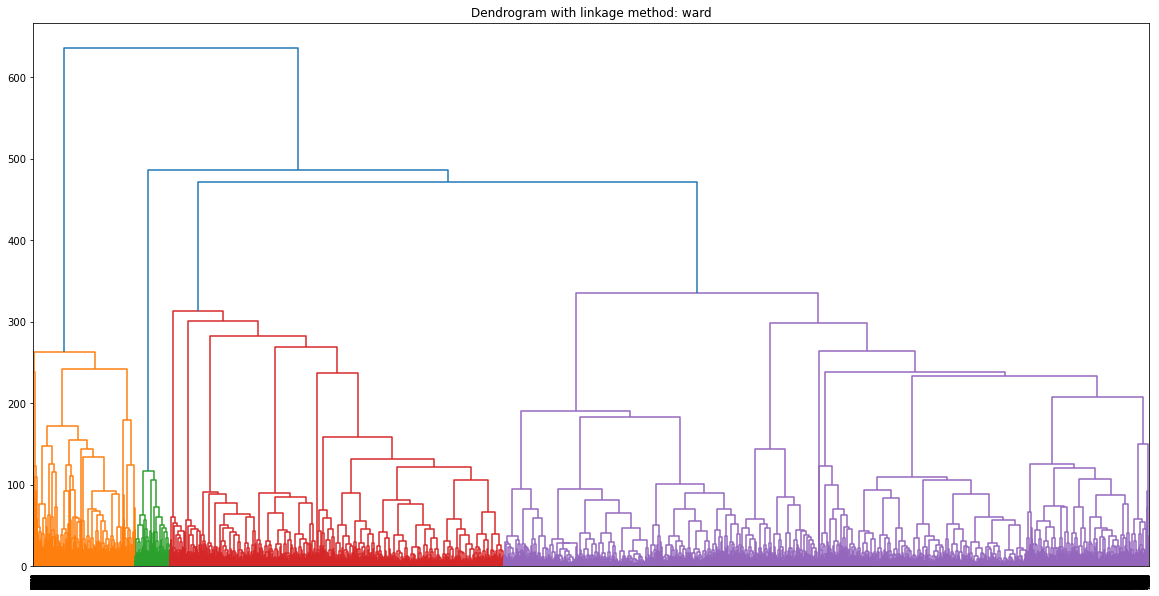

In [22]:
agg_opt()

In [23]:
agg_test('ward', 3)

AUPRC score: 0.30
Silhouette score: 0.34
ARI score: 0.01


After applying PCA, the highest values found were 0.31 for AUPRC, 0.27 for the Silhouette, and 0.01 for the ARI.<br><br>
Maybe tSNE will be better.

In [24]:
#seperate the target variable from the rest
y = model['Churn']
X = model.drop(['Churn'], 1)
#reset the data
X = scaler.fit_transform(X)


Perplexity: 5


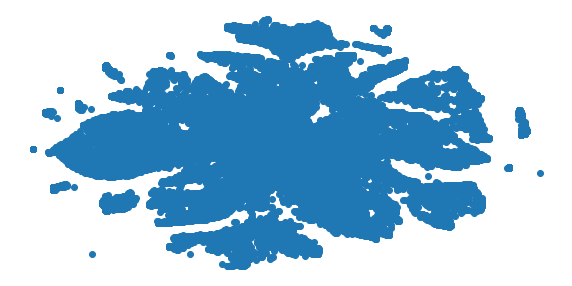

Total time: 56.653565883636475 seconds.

Perplexity: 10


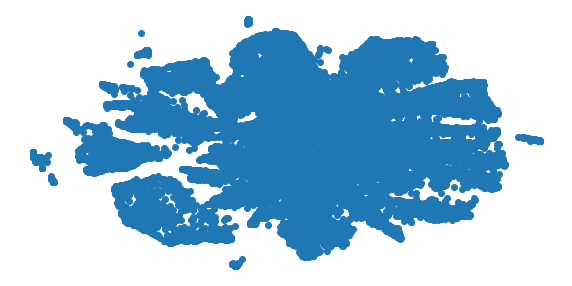

Total time: 65.78475499153137 seconds.

Perplexity: 15


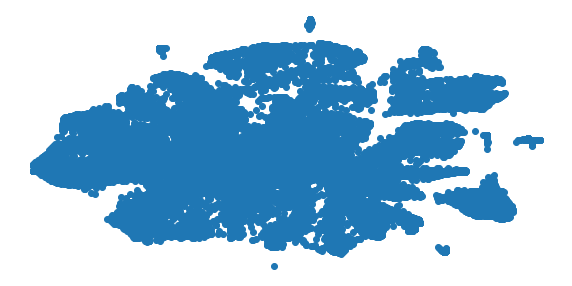

Total time: 74.24864196777344 seconds.

Perplexity: 20


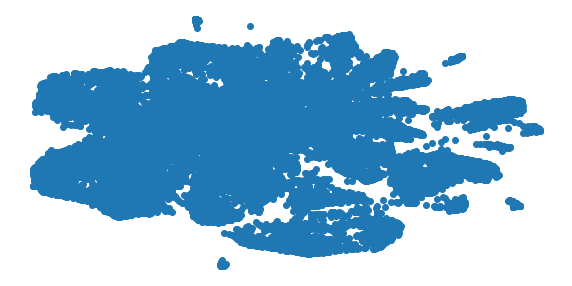

Total time: 65.79936337471008 seconds.

Perplexity: 25


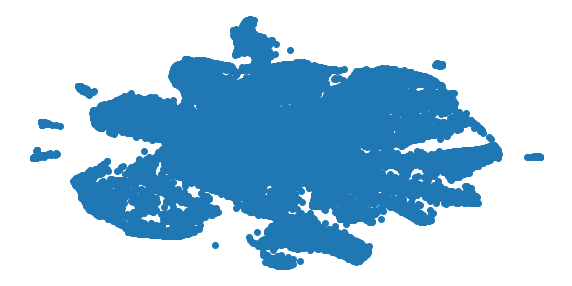

Total time: 75.89961767196655 seconds.

Perplexity: 30


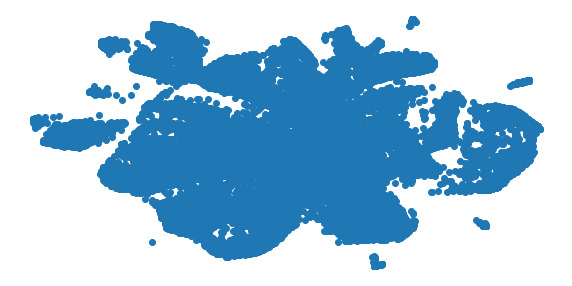

Total time: 78.19225096702576 seconds.

Perplexity: 35


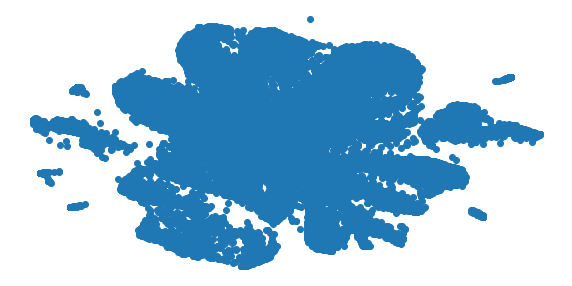

Total time: 82.72340226173401 seconds.

Perplexity: 40


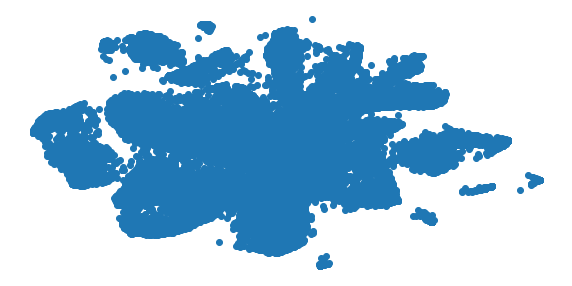

Total time: 79.24648404121399 seconds.

Perplexity: 45


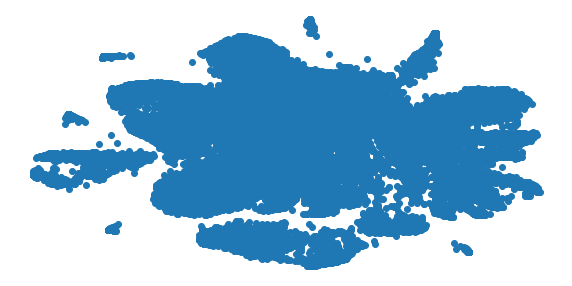

Total time: 87.35716104507446 seconds.

Perplexity: 50


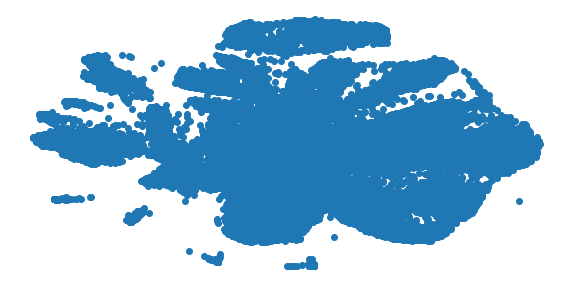

Total time: 85.97942924499512 seconds.


In [25]:
for i in range(1, 11):
    t0 = time.time()
    print('\nPerplexity: {}'.format(i*5))
    tsne_test(2, i*5)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.'.format(total))


Perplexity: 5


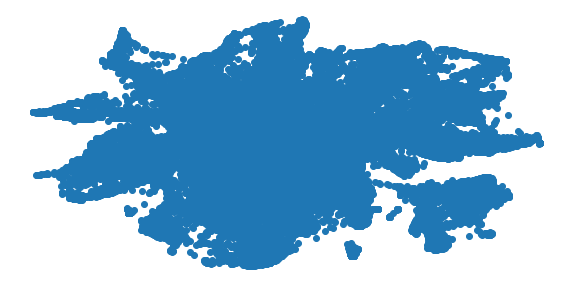

Total time: 108.39967656135559 seconds.

Perplexity: 10


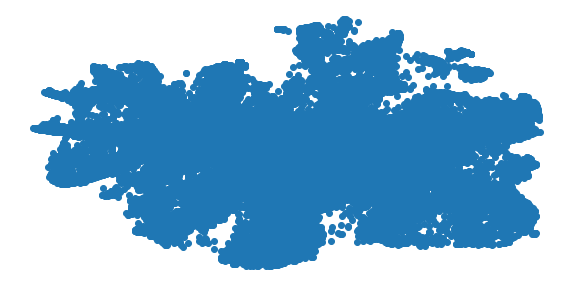

Total time: 118.83698320388794 seconds.

Perplexity: 15


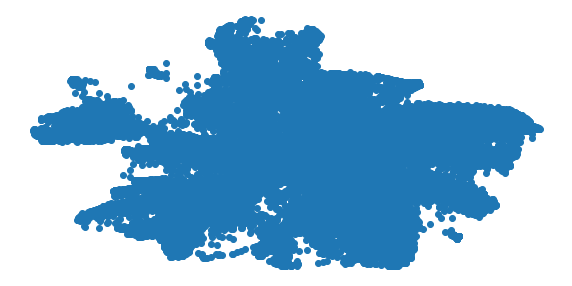

Total time: 106.72544288635254 seconds.

Perplexity: 20


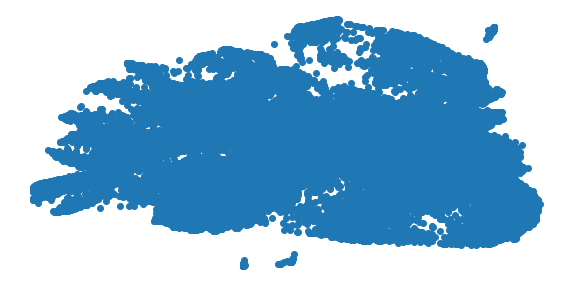

Total time: 137.46743249893188 seconds.

Perplexity: 25


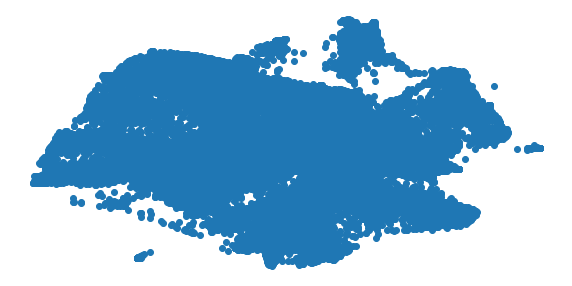

Total time: 122.05294489860535 seconds.

Perplexity: 30


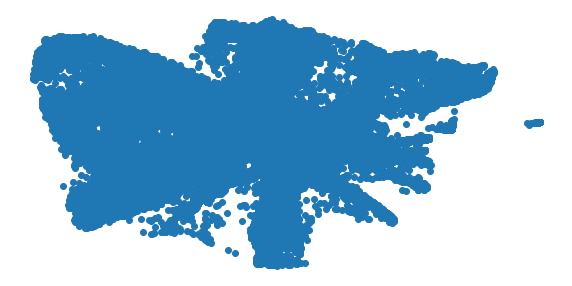

Total time: 126.00147533416748 seconds.

Perplexity: 35


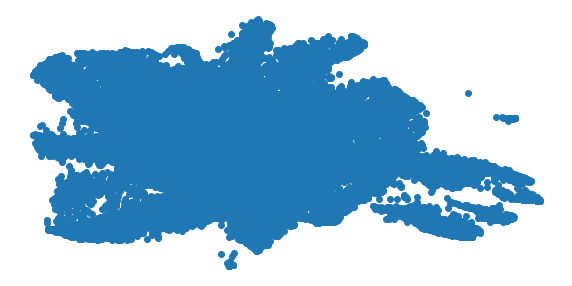

Total time: 153.607754945755 seconds.

Perplexity: 40


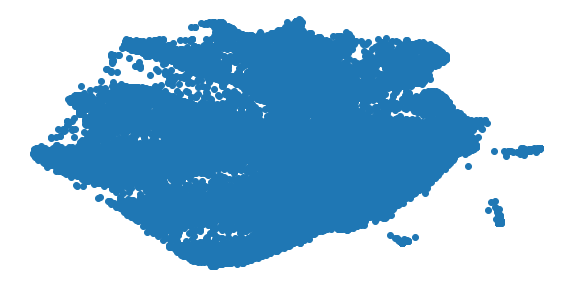

Total time: 163.78238320350647 seconds.

Perplexity: 45


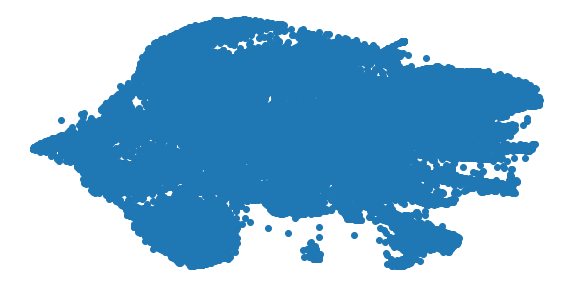

Total time: 132.54730653762817 seconds.

Perplexity: 50


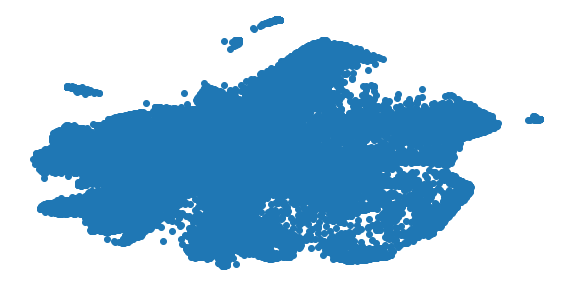

Total time: 141.95976400375366 seconds.


In [26]:
for i in range(1, 11):
    t0 = time.time()
    print('\nPerplexity: {}'.format(i*5))
    tsne_test(3, i*5)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.'.format(total))

None of these look great but n_components=3 and perplexity=35 has a clearly seperate group, so those are the parameters we'll use.

In [27]:
#transform the data with tSNE
t0 = time.time()
tsne = TSNE(n_components=3, verbose=0, perplexity=35, n_iter=300, n_jobs=-1)
X = tsne.fit_transform(X)
t1 = time.time()
total = t1-t0
print('Total time: {} seconds.'.format(total))

Total time: 124.75015354156494 seconds.


In [28]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.28
Silhouette score: 0.28
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.29
Silhouette score: 0.28
ARI score: -0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.30
ARI score: 0.00

Number of clusters: 5
AUPRC score: 0.28
Silhouette score: 0.30
ARI score: 0.00

Number of clusters: 6
AUPRC score: 0.28
Silhouette score: 0.30
ARI score: -0.00

Number of clusters: 7
AUPRC score: 0.28
Silhouette score: 0.32
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.29
Silhouette score: 0.34
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.29
Silhouette score: 0.35
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.27
Silhouette score: 0.35
ARI score: 0.00


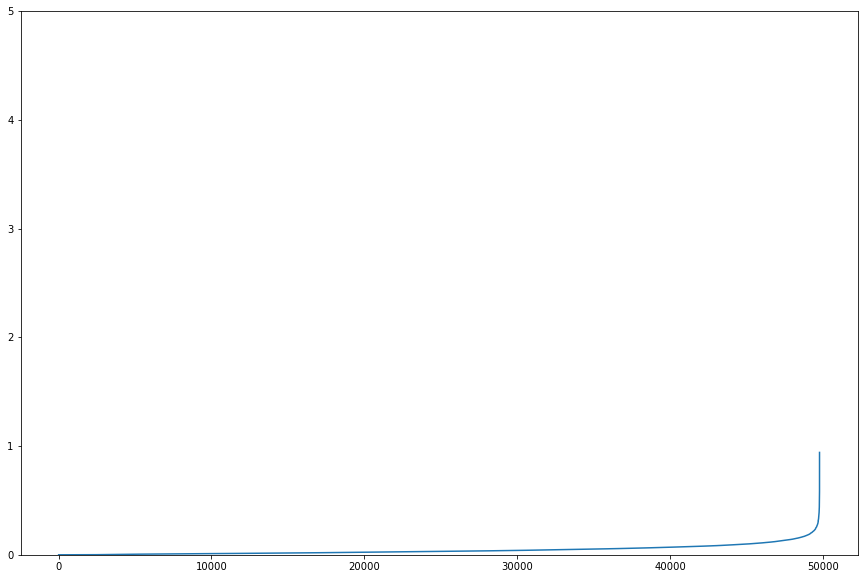

In [29]:
dbscan_opt(2)

In [30]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(0.4,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.28
Silhouette score: -0.14
ARI score: 0.02
Total time: 32.19964861869812 seconds.

AUPRC score: 0.28
Silhouette score: 0.19
ARI score: 0.00
Total time: 30.593534231185913 seconds.

AUPRC score: 0.28
Silhouette score: 0.33
ARI score: 0.00
Total time: 30.38999581336975 seconds.

AUPRC score: 0.28
Silhouette score: 0.31
ARI score: 0.00
Total time: 30.44310212135315 seconds.

AUPRC score: 0.28
Silhouette score: 0.26
ARI score: 0.00
Total time: 30.5164053440094 seconds.

AUPRC score: 0.29
Silhouette score: 0.24
ARI score: 0.01
Total time: 30.805163860321045 seconds.

AUPRC score: 0.29
Silhouette score: 0.14
ARI score: 0.01
Total time: 31.126144886016846 seconds.

AUPRC score: 0.29
Silhouette score: 0.03
ARI score: 0.01
Total time: 31.425777196884155 seconds.

AUPRC score: 0.29
Silhouette score: -0.04
ARI score: 0.02
Total time: 31.772525548934937 seconds.

AUPRC score: 0.29
Silhouette score: -0.11
ARI score: 0.02
Total time: 32.06773543357849 seconds.



In [31]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.28
Silhouette score: 0.28
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.29
Silhouette score: 0.27
ARI score: 0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.25
ARI score: -0.00

Number of clusters: 5
AUPRC score: 0.29
Silhouette score: 0.23
ARI score: -0.00

Number of clusters: 6
AUPRC score: 0.28
Silhouette score: 0.21
ARI score: 0.00

Number of clusters: 7
AUPRC score: 0.29
Silhouette score: 0.11
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.28
Silhouette score: 0.28
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.30
Silhouette score: 0.27
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.29
Silhouette score: 0.27
ARI score: 0.00


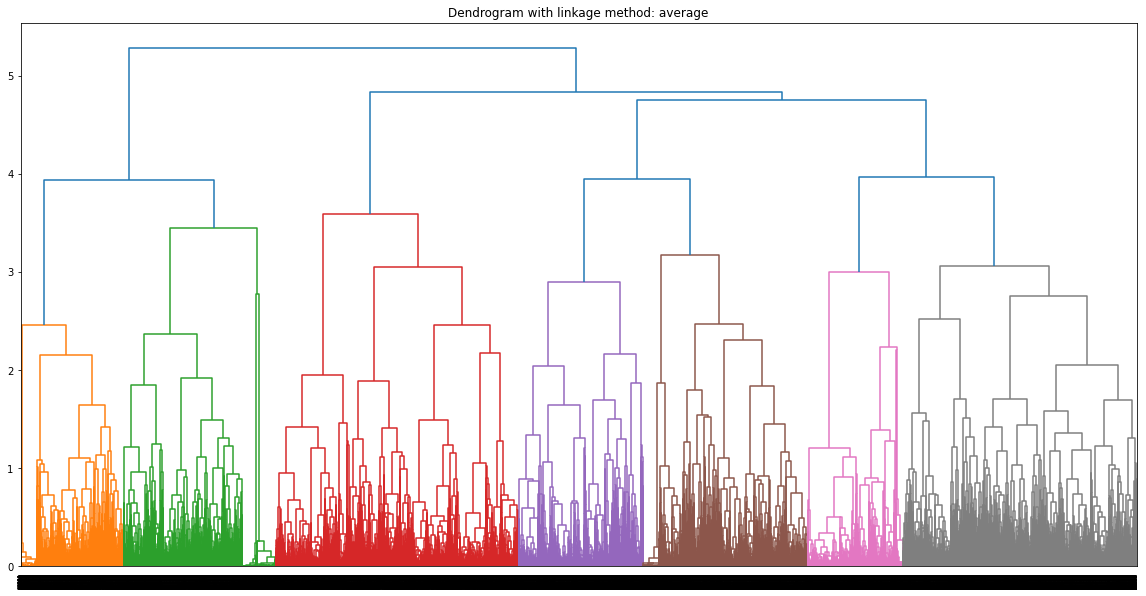

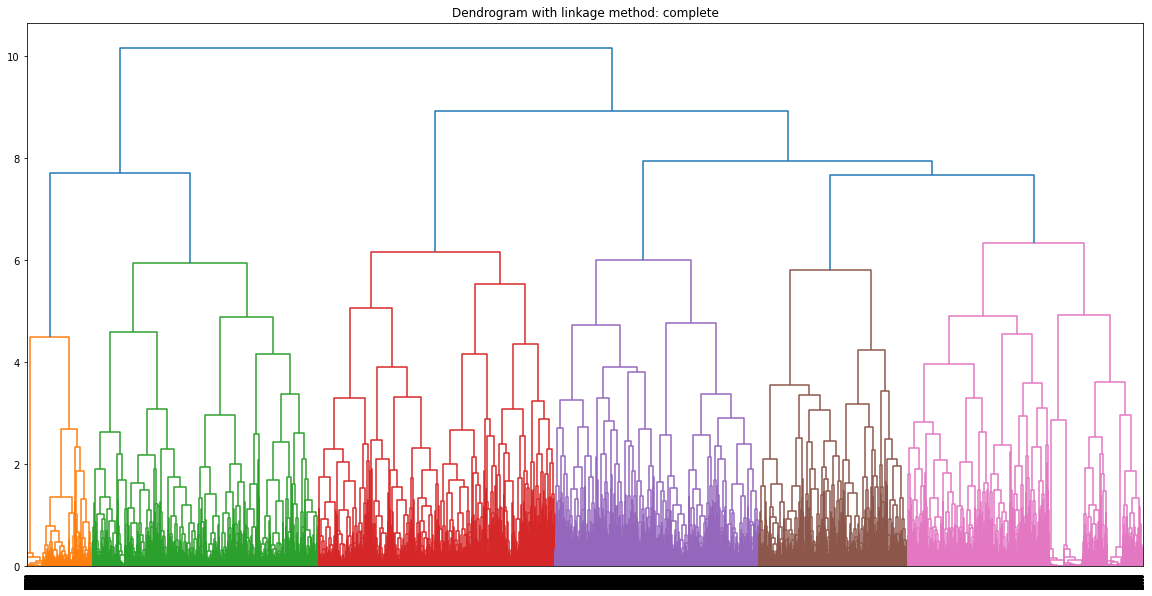

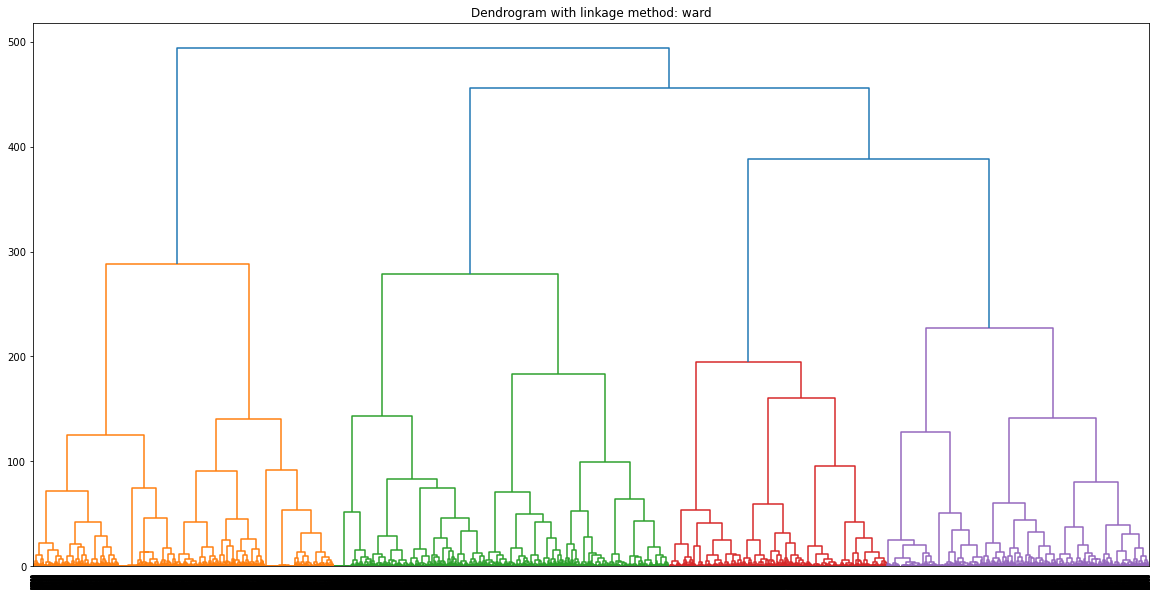

In [32]:
agg_opt()

In [33]:
agg_test('ward', 7)

AUPRC score: 0.28
Silhouette score: 0.30
ARI score: -0.00


After using tSNE to transform the data, the highest values found were 0.29 for AUPRC, 0.32 for the Silhouette, and 0.02 for the ARI.<br><br>
Since UMAP is so much more recently developed, it's possible that it will proffer more information.

In [34]:
#seperate the target variable from the rest
y = model['Churn']
X = model.drop(['Churn'], 1)
#reset the data
X = scaler.fit_transform(X)

Parameters: 10, 0.2


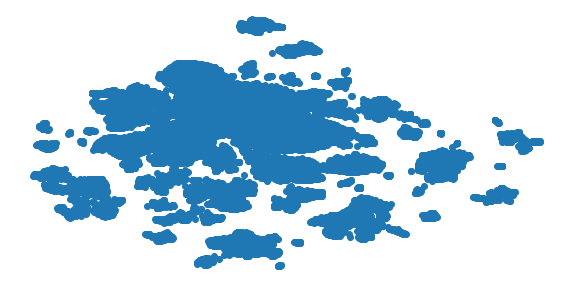

Total time: 21.224689960479736 seconds.

Parameters: 10, 0.30000000000000004


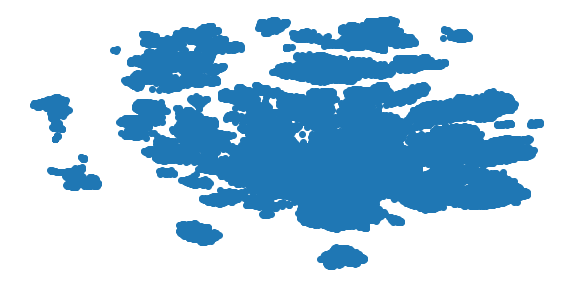

Total time: 8.801241397857666 seconds.

Parameters: 10, 0.4


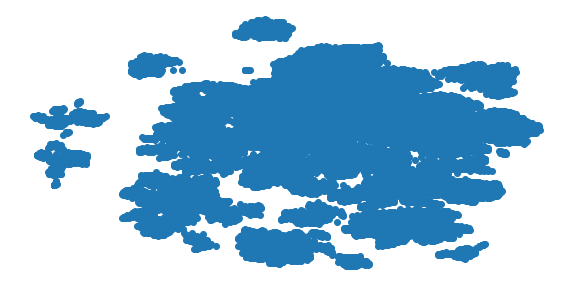

Total time: 8.838863372802734 seconds.

Parameters: 10, 0.5


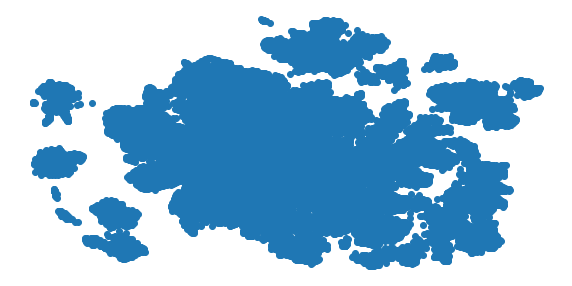

Total time: 8.920021772384644 seconds.

Parameters: 10, 0.6000000000000001


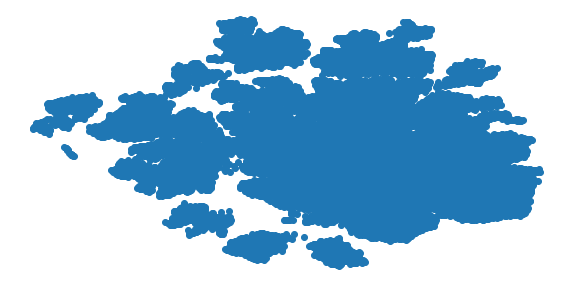

Total time: 8.737178087234497 seconds.

Parameters: 10, 0.7000000000000001


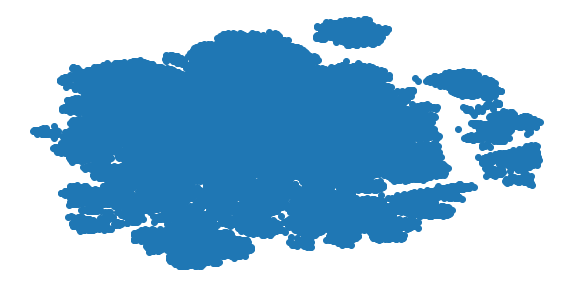

Total time: 9.106380224227905 seconds.

Parameters: 10, 0.8


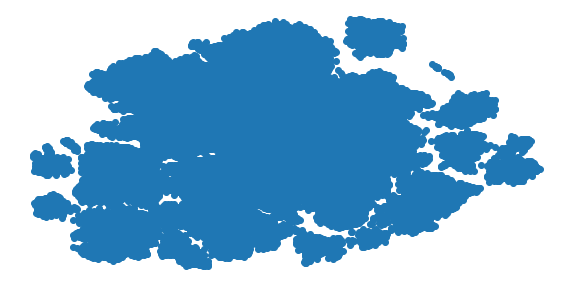

Total time: 8.731364965438843 seconds.

Parameters: 10, 0.9


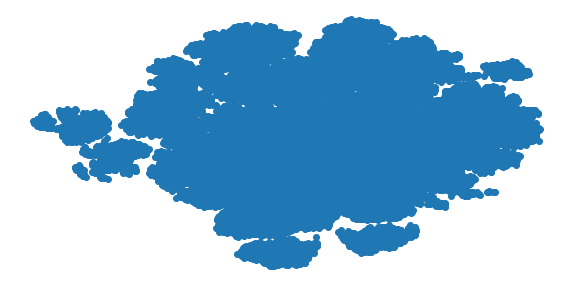

Total time: 8.86741042137146 seconds.

Parameters: 10, 1.0


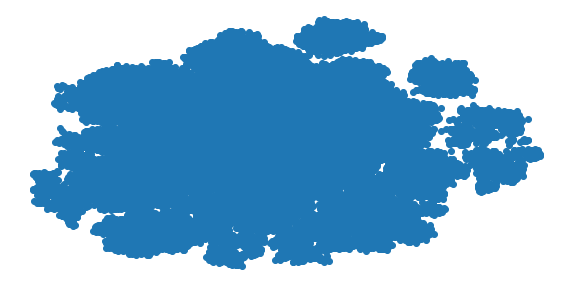

Total time: 8.788929462432861 seconds.

Parameters: 15, 0.2


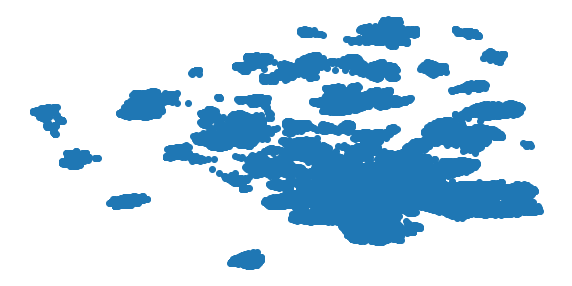

Total time: 10.34740662574768 seconds.

Parameters: 15, 0.30000000000000004


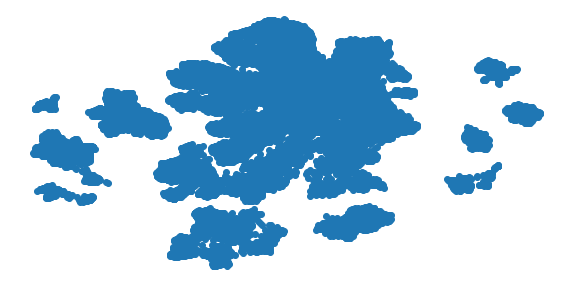

Total time: 10.14392638206482 seconds.

Parameters: 15, 0.4


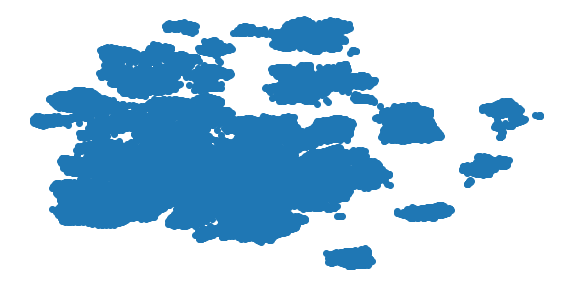

Total time: 10.331064462661743 seconds.

Parameters: 15, 0.5


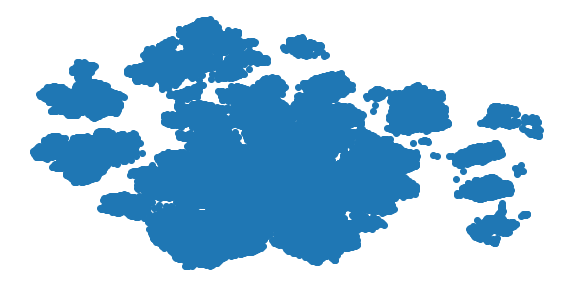

Total time: 10.126440286636353 seconds.

Parameters: 15, 0.6000000000000001


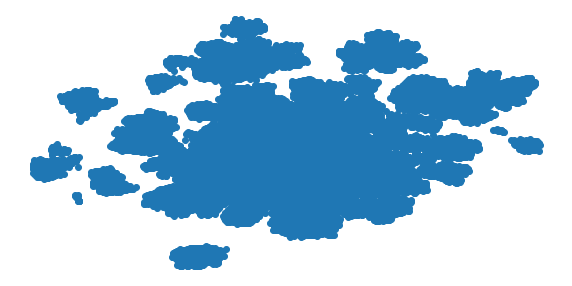

Total time: 10.349313974380493 seconds.

Parameters: 15, 0.7000000000000001


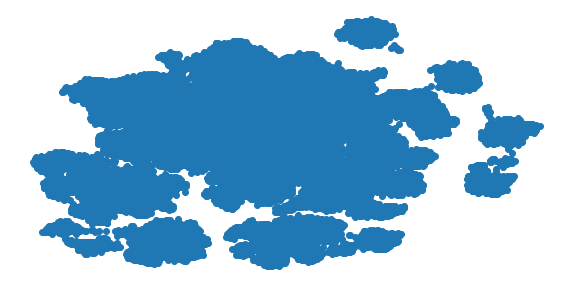

Total time: 10.125670671463013 seconds.

Parameters: 15, 0.8


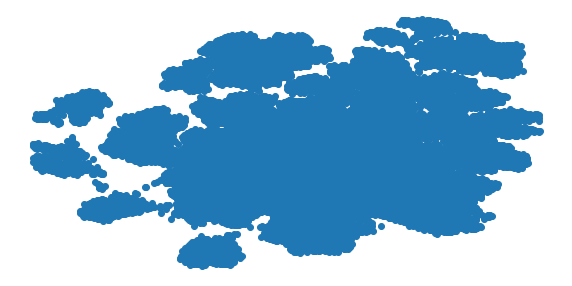

Total time: 10.295548439025879 seconds.

Parameters: 15, 0.9


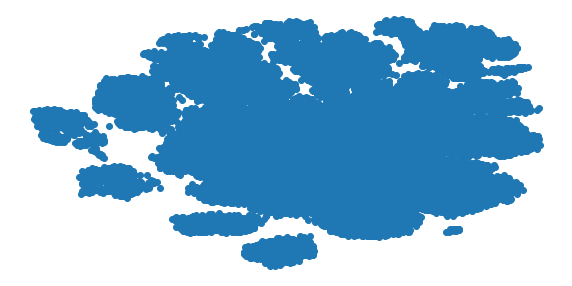

Total time: 10.23859167098999 seconds.

Parameters: 15, 1.0


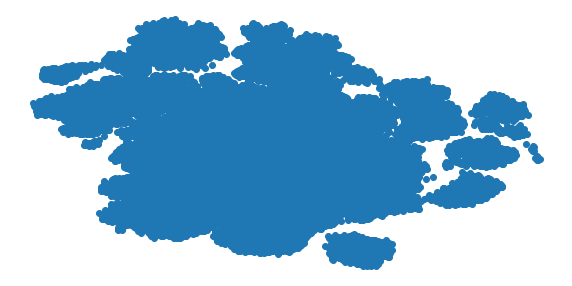

Total time: 10.300484895706177 seconds.

Parameters: 20, 0.2


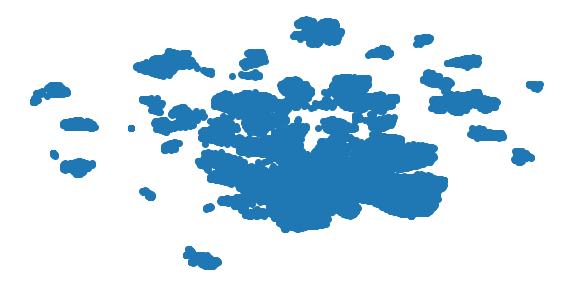

Total time: 11.571386337280273 seconds.

Parameters: 20, 0.30000000000000004


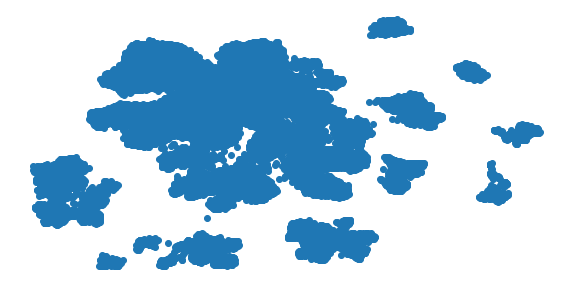

Total time: 11.626111030578613 seconds.

Parameters: 20, 0.4


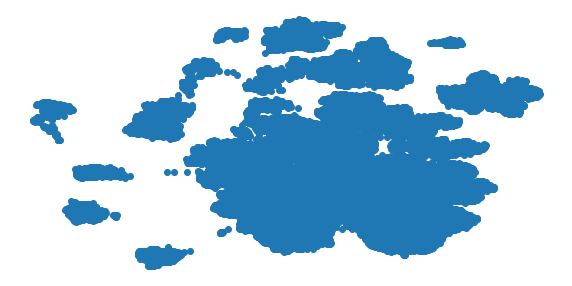

Total time: 11.62741994857788 seconds.

Parameters: 20, 0.5


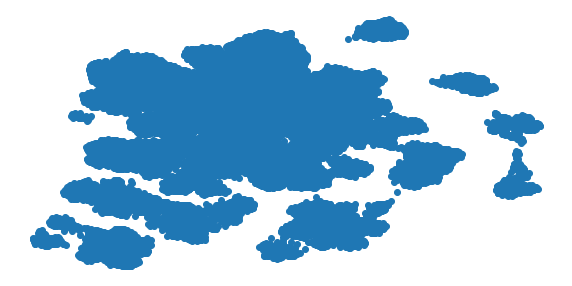

Total time: 11.62037181854248 seconds.

Parameters: 20, 0.6000000000000001


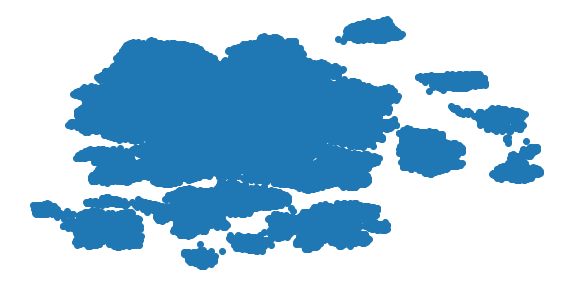

Total time: 11.604839563369751 seconds.

Parameters: 20, 0.7000000000000001


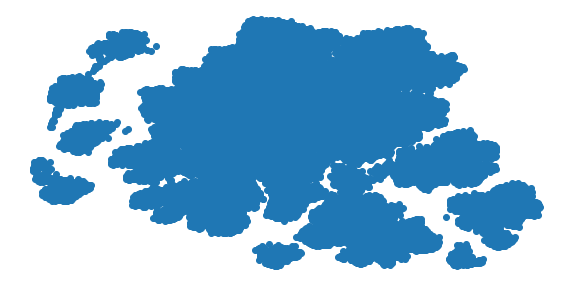

Total time: 11.65619945526123 seconds.

Parameters: 20, 0.8


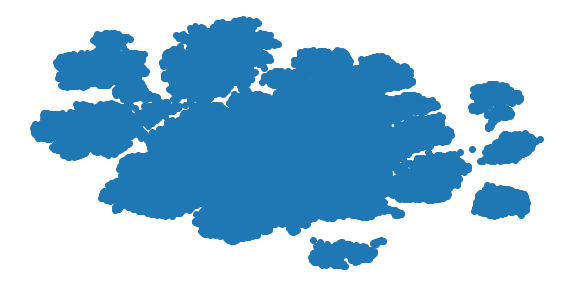

Total time: 11.64843225479126 seconds.

Parameters: 20, 0.9


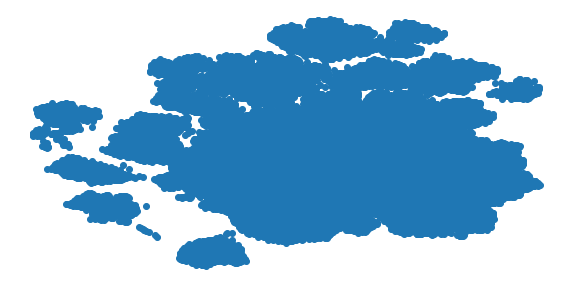

Total time: 11.580284833908081 seconds.

Parameters: 20, 1.0


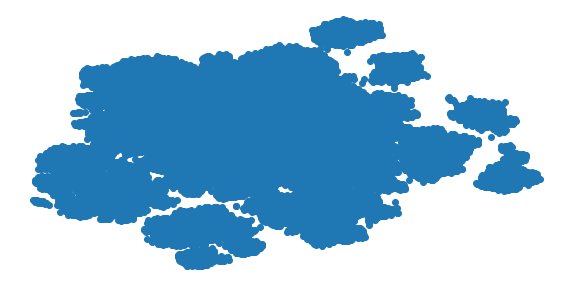

Total time: 11.58150339126587 seconds.

Parameters: 25, 0.2


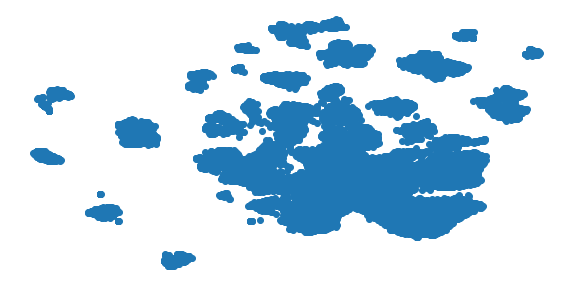

Total time: 13.200666189193726 seconds.

Parameters: 25, 0.30000000000000004


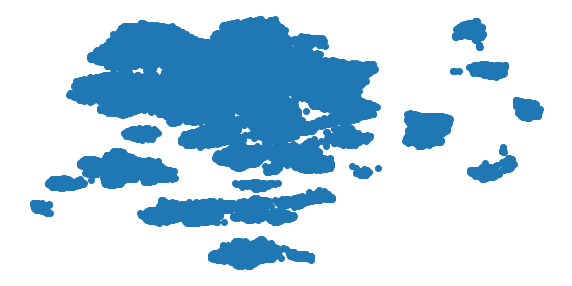

Total time: 13.058790445327759 seconds.

Parameters: 25, 0.4


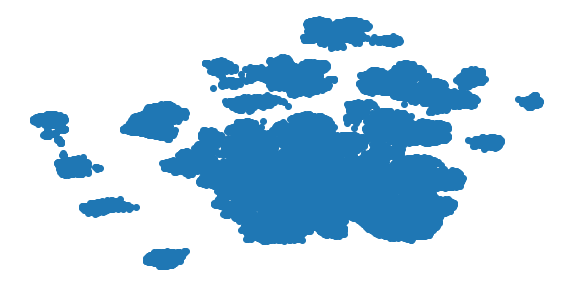

Total time: 13.017552375793457 seconds.

Parameters: 25, 0.5


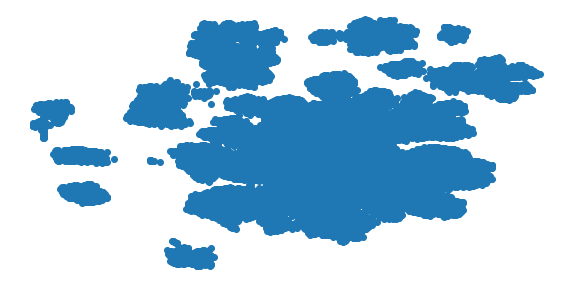

Total time: 12.900059461593628 seconds.

Parameters: 25, 0.6000000000000001


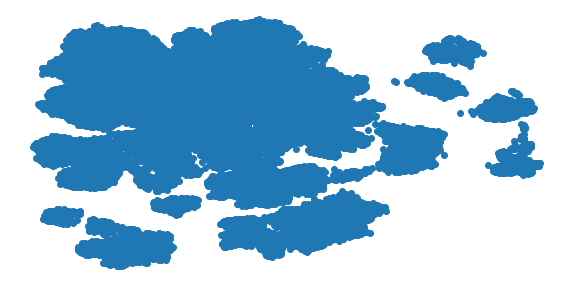

Total time: 13.115658521652222 seconds.

Parameters: 25, 0.7000000000000001


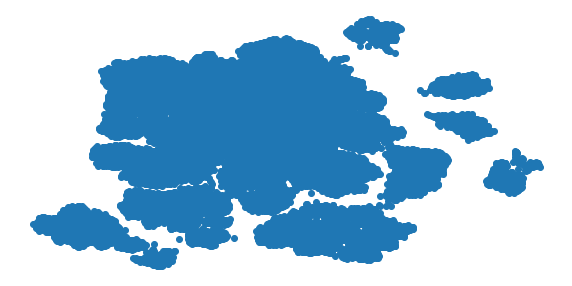

Total time: 12.97482419013977 seconds.

Parameters: 25, 0.8


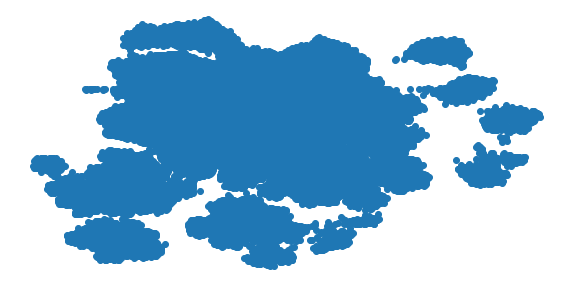

Total time: 13.141879320144653 seconds.

Parameters: 25, 0.9


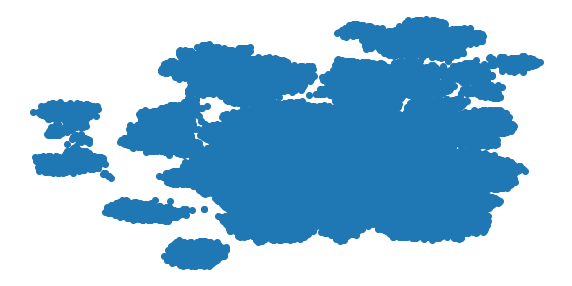

Total time: 12.921180248260498 seconds.

Parameters: 25, 1.0


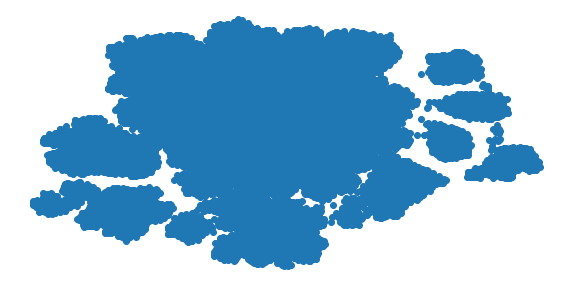

Total time: 13.172943592071533 seconds.

Parameters: 30, 0.2


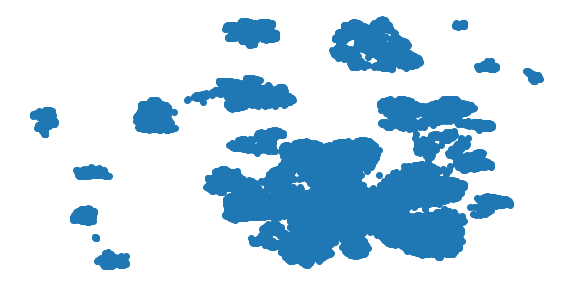

Total time: 12.708813667297363 seconds.

Parameters: 30, 0.30000000000000004


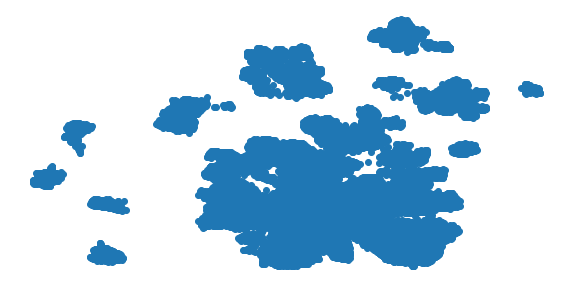

Total time: 12.890398979187012 seconds.

Parameters: 30, 0.4


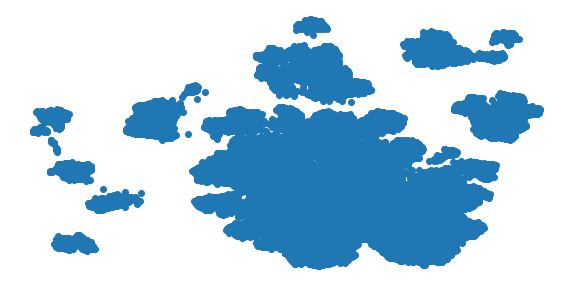

Total time: 12.656028270721436 seconds.

Parameters: 30, 0.5


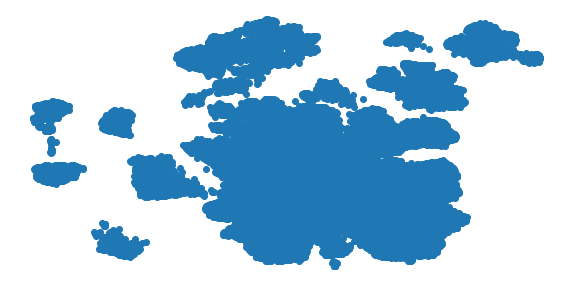

Total time: 12.785970211029053 seconds.

Parameters: 30, 0.6000000000000001


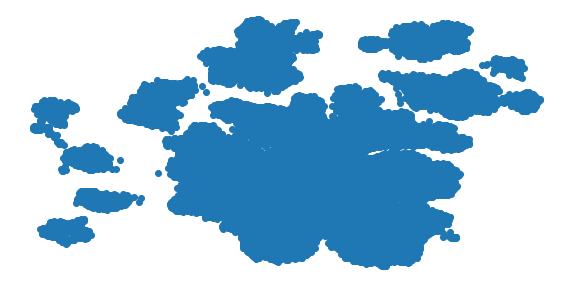

Total time: 14.42927074432373 seconds.

Parameters: 30, 0.7000000000000001


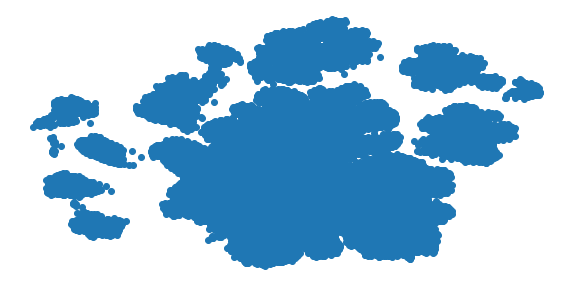

Total time: 12.818271160125732 seconds.

Parameters: 30, 0.8


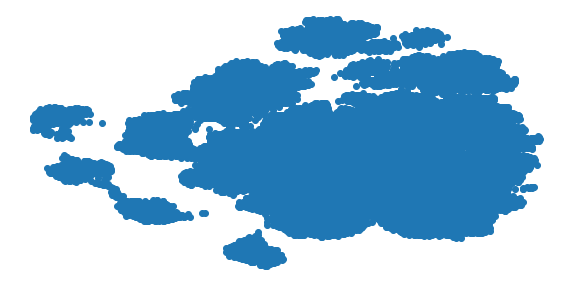

Total time: 12.769739151000977 seconds.

Parameters: 30, 0.9


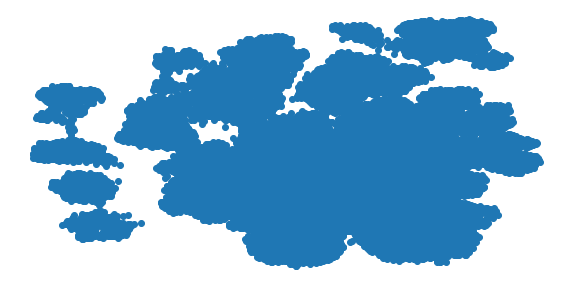

Total time: 12.768099069595337 seconds.

Parameters: 30, 1.0


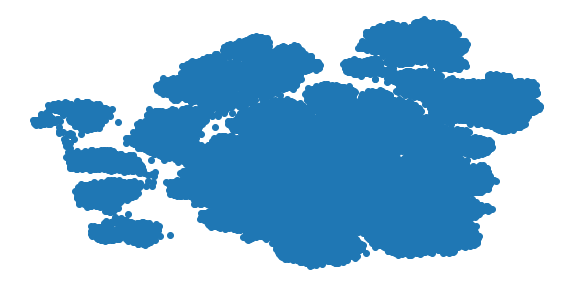

Total time: 12.660218715667725 seconds.

Parameters: 35, 0.2


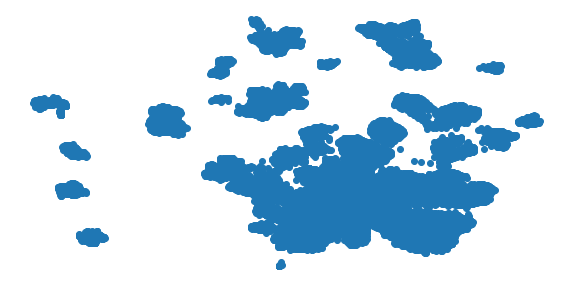

Total time: 14.26435112953186 seconds.

Parameters: 35, 0.30000000000000004


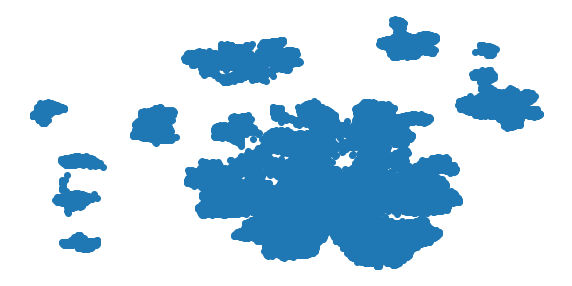

Total time: 14.019690036773682 seconds.

Parameters: 35, 0.4


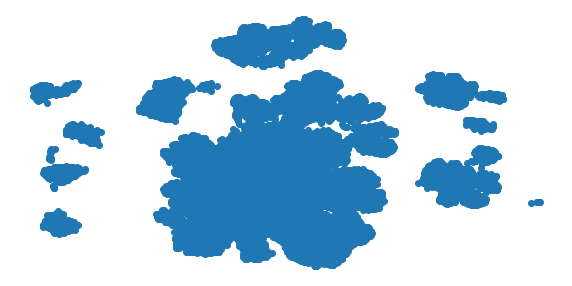

Total time: 14.1929030418396 seconds.

Parameters: 35, 0.5


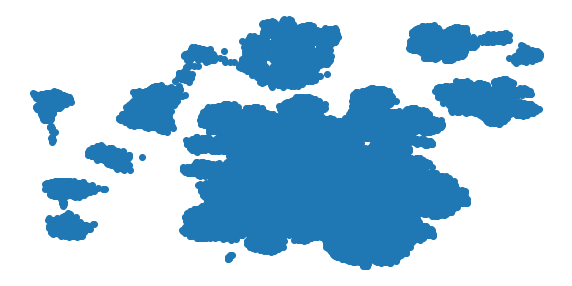

Total time: 13.993274211883545 seconds.

Parameters: 35, 0.6000000000000001


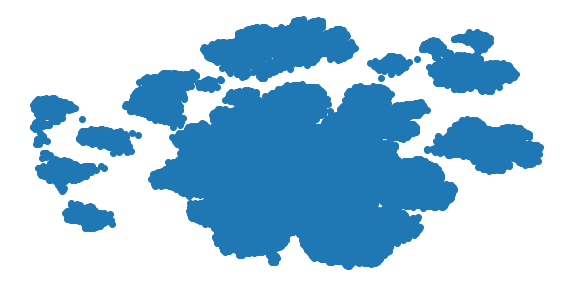

Total time: 14.18641996383667 seconds.

Parameters: 35, 0.7000000000000001


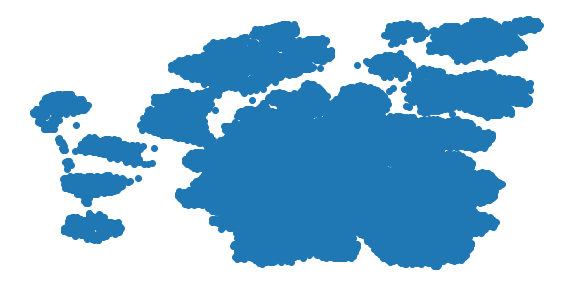

Total time: 13.997932195663452 seconds.

Parameters: 35, 0.8


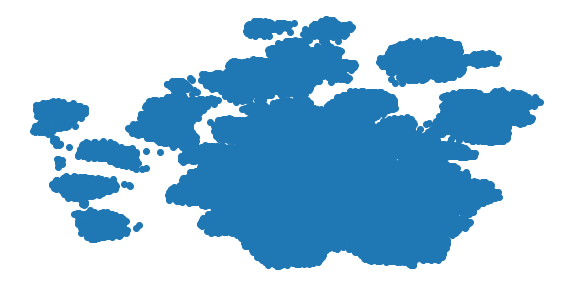

Total time: 14.080298662185669 seconds.

Parameters: 35, 0.9


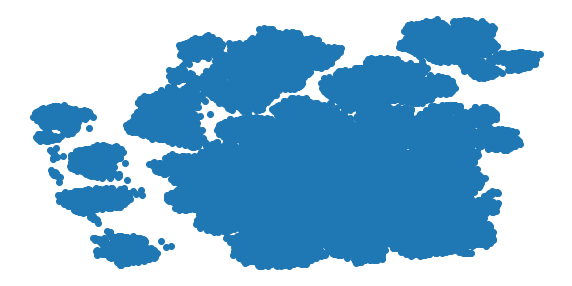

Total time: 14.093300819396973 seconds.

Parameters: 35, 1.0


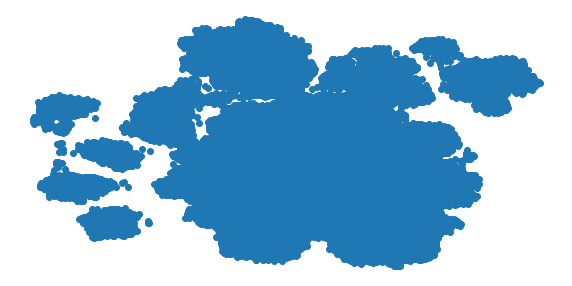

Total time: 14.075451374053955 seconds.

Parameters: 40, 0.2


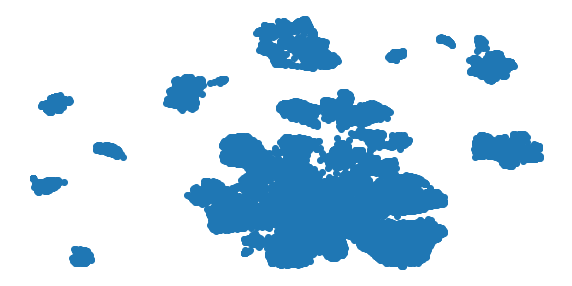

Total time: 16.05650305747986 seconds.

Parameters: 40, 0.30000000000000004


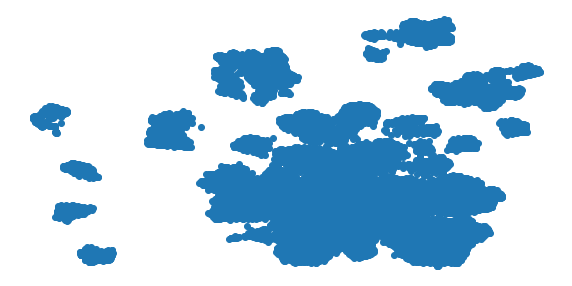

Total time: 16.026485919952393 seconds.

Parameters: 40, 0.4


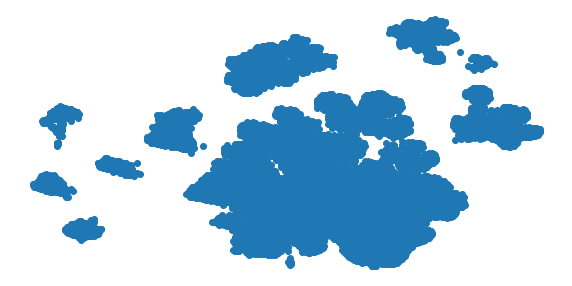

Total time: 15.935874700546265 seconds.

Parameters: 40, 0.5


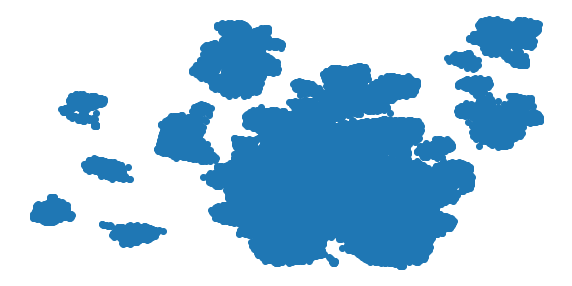

Total time: 16.3060564994812 seconds.

Parameters: 40, 0.6000000000000001


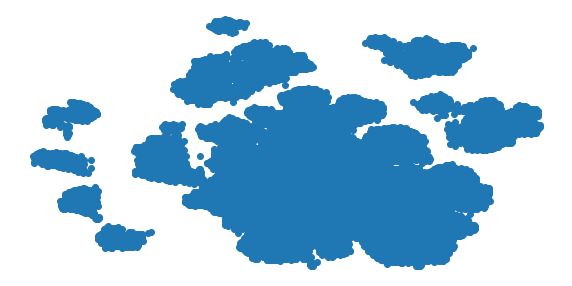

Total time: 16.0746431350708 seconds.

Parameters: 40, 0.7000000000000001


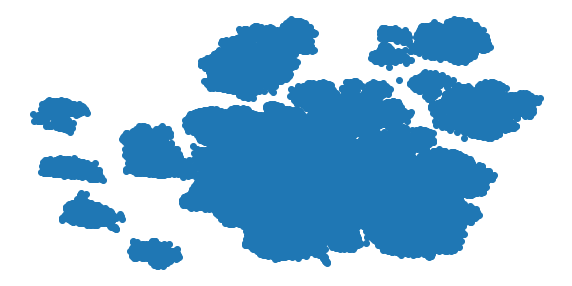

Total time: 16.127493381500244 seconds.

Parameters: 40, 0.8


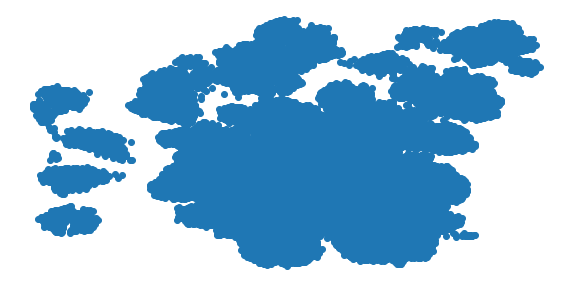

Total time: 16.305384874343872 seconds.

Parameters: 40, 0.9


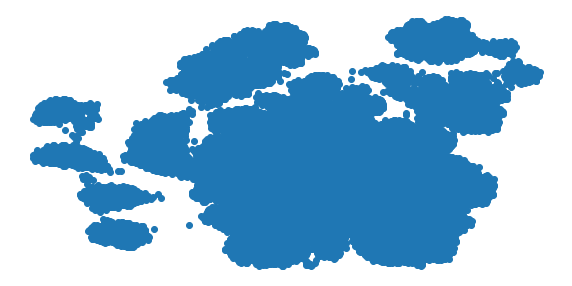

Total time: 16.176807165145874 seconds.

Parameters: 40, 1.0


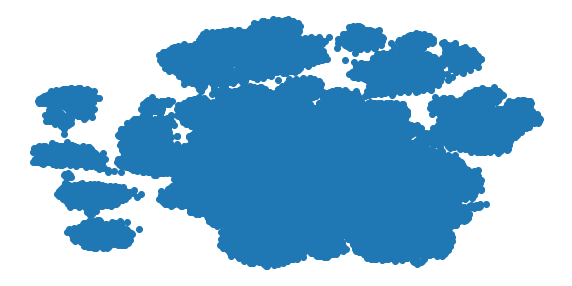

Total time: 16.195358514785767 seconds.

Parameters: 45, 0.2


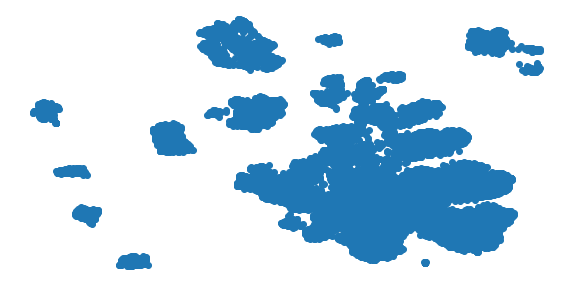

Total time: 18.27455234527588 seconds.

Parameters: 45, 0.30000000000000004


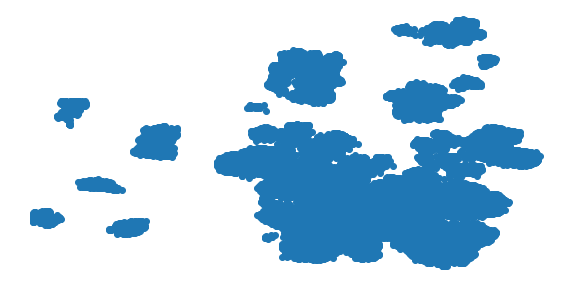

Total time: 18.263704776763916 seconds.

Parameters: 45, 0.4


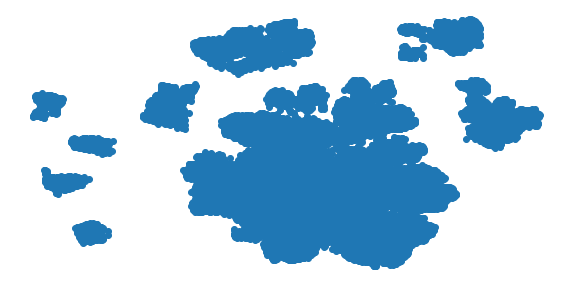

Total time: 18.437294483184814 seconds.

Parameters: 45, 0.5


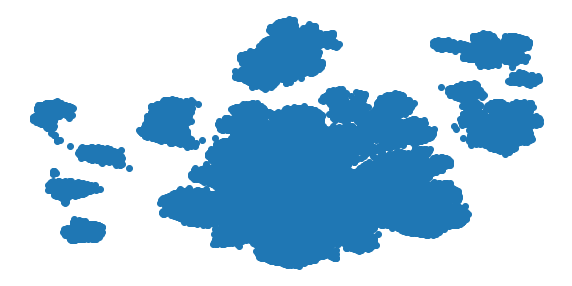

Total time: 18.30291748046875 seconds.

Parameters: 45, 0.6000000000000001


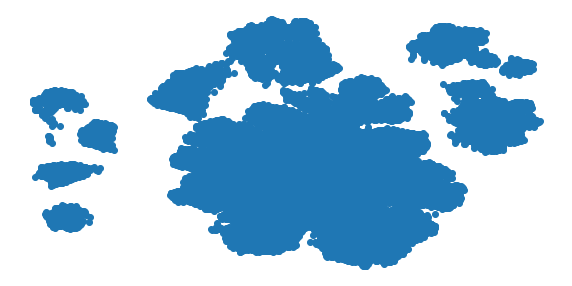

Total time: 18.46419095993042 seconds.

Parameters: 45, 0.7000000000000001


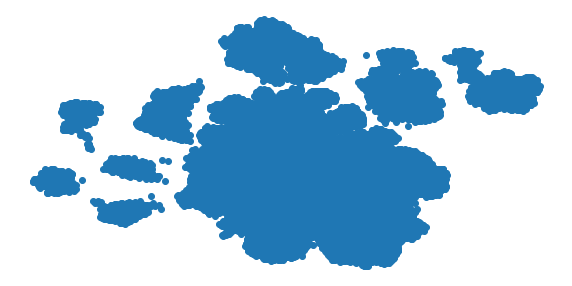

Total time: 18.237244129180908 seconds.

Parameters: 45, 0.8


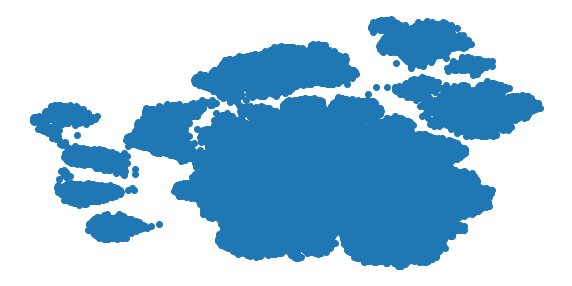

Total time: 18.412087440490723 seconds.

Parameters: 45, 0.9


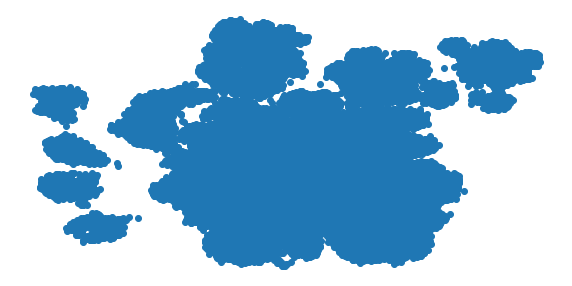

Total time: 18.357222080230713 seconds.

Parameters: 45, 1.0


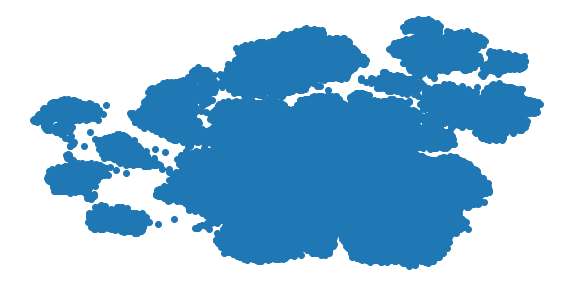

Total time: 18.429417371749878 seconds.

Parameters: 50, 0.2


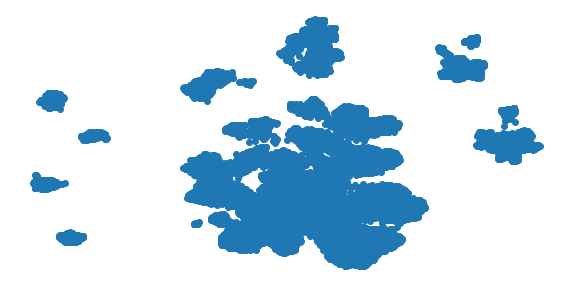

Total time: 20.544001817703247 seconds.

Parameters: 50, 0.30000000000000004


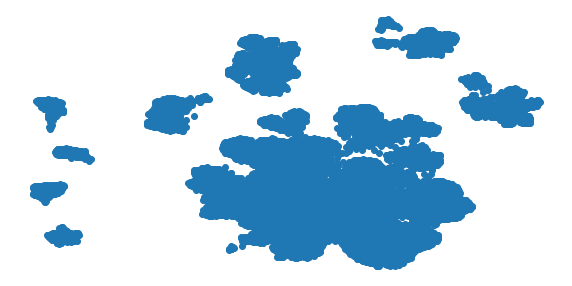

Total time: 20.558506965637207 seconds.

Parameters: 50, 0.4


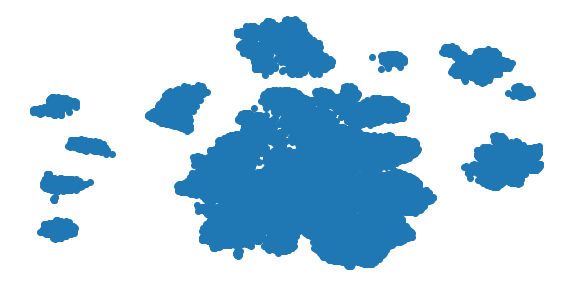

Total time: 20.38511085510254 seconds.

Parameters: 50, 0.5


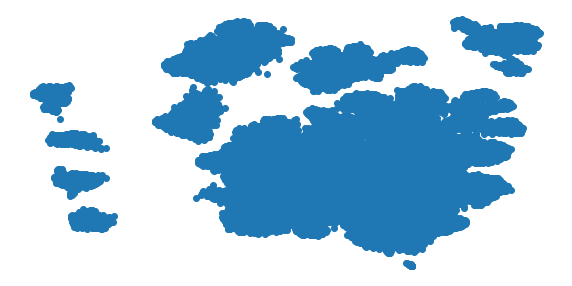

Total time: 20.616679191589355 seconds.

Parameters: 50, 0.6000000000000001


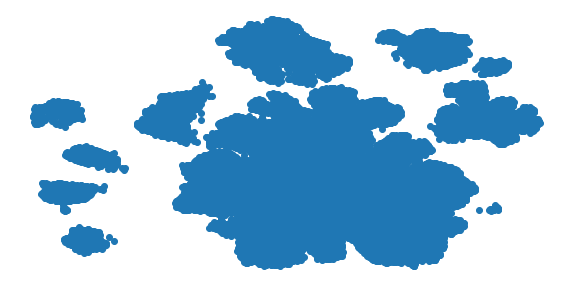

Total time: 20.47652769088745 seconds.

Parameters: 50, 0.7000000000000001


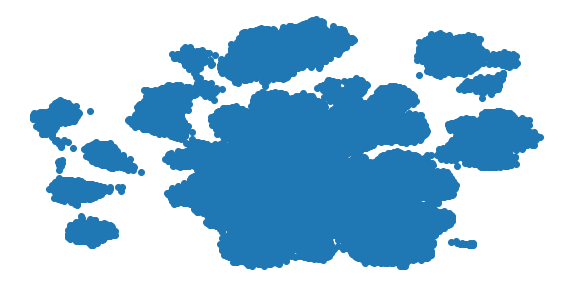

Total time: 20.531736373901367 seconds.

Parameters: 50, 0.8


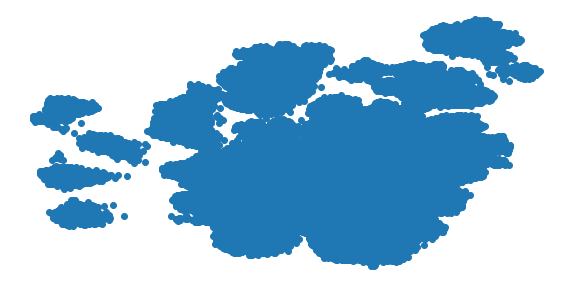

Total time: 20.556804180145264 seconds.

Parameters: 50, 0.9


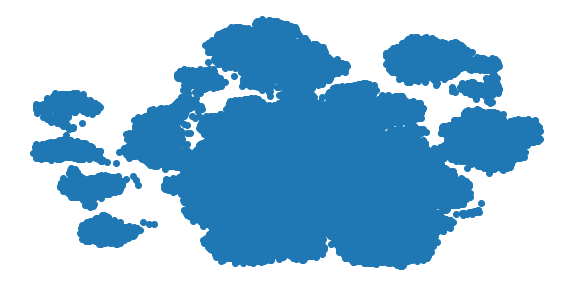

Total time: 20.48611092567444 seconds.

Parameters: 50, 1.0


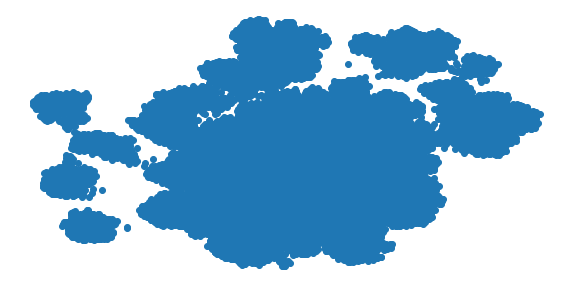

Total time: 20.43363642692566 seconds.



In [35]:
for n in range(2, 11):
    for d in range(2, 11):
        t0 = time.time()
        umap_test(n*5, d*.1)
        t1 = time.time()
        total = t1-t0
        print('Total time: {} seconds.\n'.format(total))

UMAP gives us much more seperation of the data. While n_neighbors=50 and min_dist=0.4 was chosen, there were several that could have been used and further testing may show some better results. However, the amount gained for the time and energy invested (at least in terms of this educational capstone) is likely negligible.<br><br>
Also, though there are only two possible answers for our 'target', it's important to remember that clusters need not be limited to only those two. For instance, "OwnsMotorcycle" and "BuysViaMailOrder" might be a cluster that highly relates to "No".

In [36]:
X = umap.UMAP(n_neighbors=50, min_dist=0.4,
                      metric='correlation').fit_transform(X)

In [37]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    kmeans_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.41
ARI score: 0.00

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.40
ARI score: 0.00

Number of clusters: 4
AUPRC score: 0.28
Silhouette score: 0.41
ARI score: 0.01

Number of clusters: 5
AUPRC score: 0.28
Silhouette score: 0.37
ARI score: 0.01

Number of clusters: 6
AUPRC score: 0.30
Silhouette score: 0.37
ARI score: 0.01

Number of clusters: 7
AUPRC score: 0.28
Silhouette score: 0.38
ARI score: 0.00

Number of clusters: 8
AUPRC score: 0.28
Silhouette score: 0.41
ARI score: 0.00

Number of clusters: 9
AUPRC score: 0.28
Silhouette score: 0.43
ARI score: 0.00

Number of clusters: 10
AUPRC score: 0.29
Silhouette score: 0.44
ARI score: 0.00


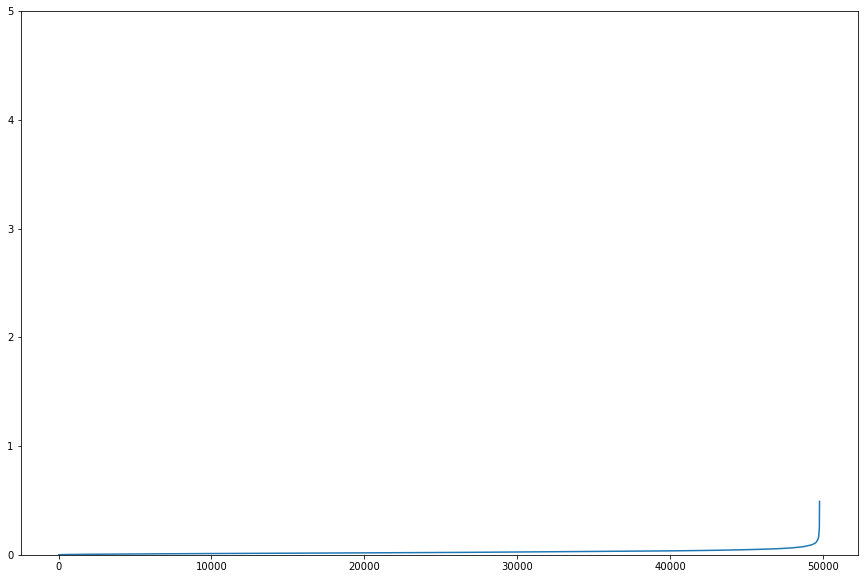

In [38]:
dbscan_opt(2)

In [39]:
for i in range(1, 11):
    t0 = time.time()
    dbscan_test(0.2,i*50)
    t1 = time.time()
    total = t1-t0
    print('Total time: {} seconds.\n'.format(total))

AUPRC score: 0.29
Silhouette score: 0.07
ARI score: 0.01
Total time: 37.056761264801025 seconds.

AUPRC score: 0.28
Silhouette score: -0.40
ARI score: -0.00
Total time: 38.68675780296326 seconds.

AUPRC score: 0.29
Silhouette score: -0.32
ARI score: -0.00
Total time: 39.88559317588806 seconds.

AUPRC score: 0.29


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [40]:
for i in range(2, 11):
    print('\nNumber of clusters: {}'.format(i))
    gmm_test(i)


Number of clusters: 2
AUPRC score: 0.29
Silhouette score: 0.33
ARI score: -0.00

Number of clusters: 3
AUPRC score: 0.28
Silhouette score: 0.41
ARI score: 0.00

Number of clusters: 4
AUPRC score: 0.29
Silhouette score: 0.43
ARI score: 0.01

Number of clusters: 5
AUPRC score: 0.29
Silhouette score: 0.35
ARI score: 0.01

Number of clusters: 6
AUPRC score: 0.29
Silhouette score: 0.33
ARI score: 0.01

Number of clusters: 7
AUPRC score: 0.28
Silhouette score: 0.37
ARI score: 0.01

Number of clusters: 8
AUPRC score: 0.30
Silhouette score: 0.40
ARI score: 0.01

Number of clusters: 9
AUPRC score: 0.28
Silhouette score: 0.39
ARI score: 0.01

Number of clusters: 10
AUPRC score: 0.30
Silhouette score: 0.41
ARI score: 0.00


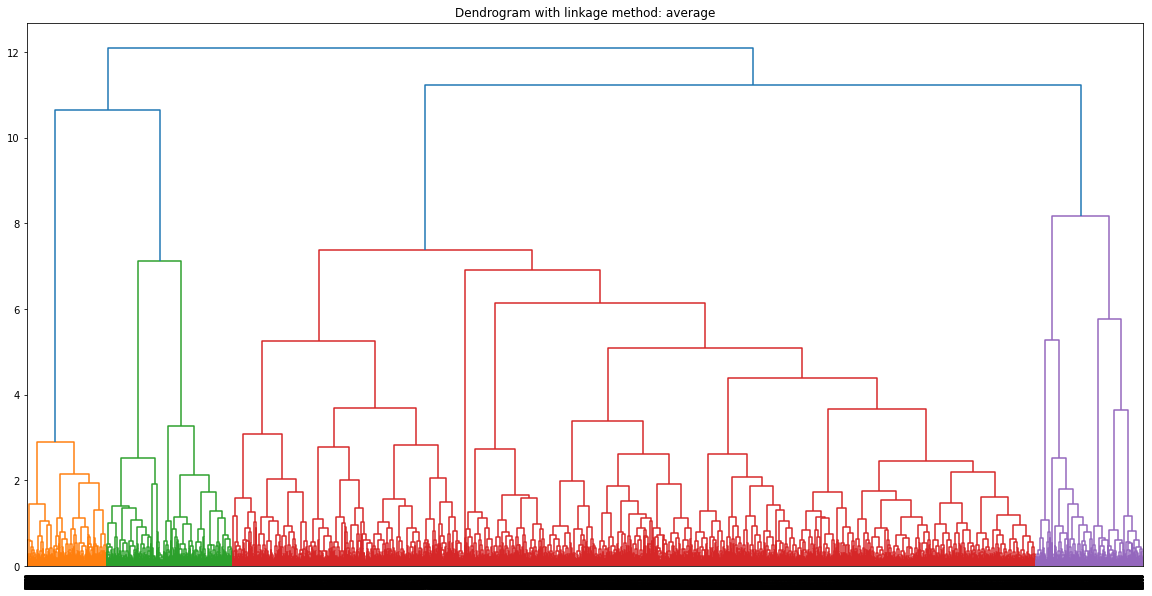

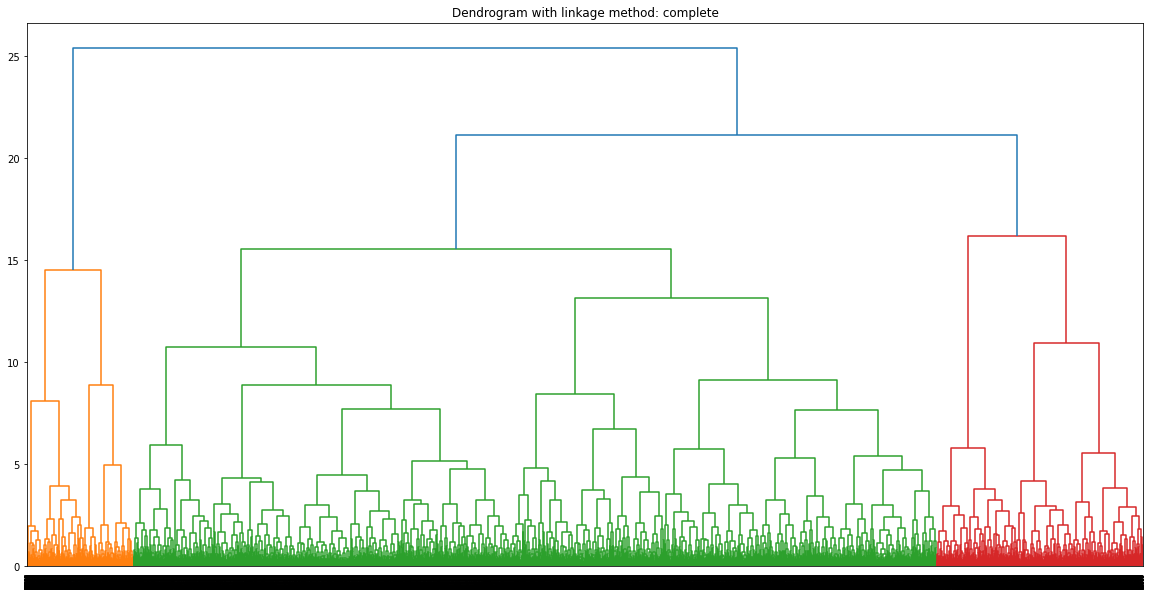

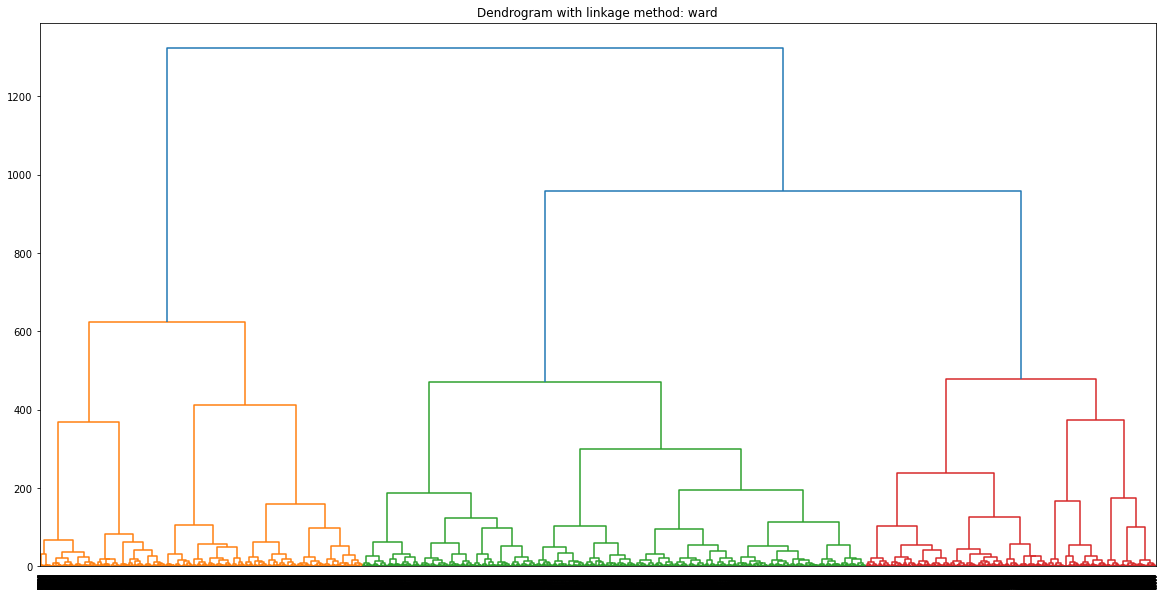

In [41]:
agg_opt()

In [47]:
agg_test('average', 5)

AUPRC score: 0.30
Silhouette score: 0.39
ARI score: 0.02


In [48]:
agg_test('complete', 3)

AUPRC score: 0.28
Silhouette score: 0.39
ARI score: 0.02


In [51]:
agg_test('ward', 4)

AUPRC score: 0.28
Silhouette score: 0.39
ARI score: 0.00


After using UMAP to transform the data, the highest values found were 0.29 for AUPRC, 0.42 for the Silhouette, and 0.01 for the ARI.<br><br>

Overall best approach:<br>
KMeans (after UMAP)<br>
Number of clusters: 2<br>
AUPRC score: 0.29<br>
Silhouette score: 0.42<br>
ARI score: -0.00<br><br>

Honorable Mention:<br>
AgglomerativeClustering (after UMAP)<br>
Linkage: Ward<br>
Number of clusters: 4<br>
AUPRC score: 0.30<br>
Silhouette score: 0.39<br>
ARI score: 0.02

# Conclusion

All of these are markedly terrible but that doesn't mean the exercise yielded no useful information. For instance, the fact that the data before and after PCA performed poorer than UMAP tells us that it isn't linearly separable. The fact that the ARI is consistently zero tells us, after removing errant code as a possiblity, that the models don't perform better than random guessing, possibly because of the numerous categorical columns used in the data.<br><br>
If I were working at a company and told I _must_ use unsupervised learning in this approach, I would use KMeans after a UMAP transformation but would caution the company heavily that the model likely won't perform sufficiently for their needs. Hopefully, I would be able to use a different approach, like a DecisionTree or perhaps a LinearRegression to see if those fit any better.